![Image](bitcoin-in-chains.webp)

# Cryptocurrency (Bitcoin) Sentiment Analysis

# 1.0 Business Understanding
### 1.1 Overview

The proposed project aims to create a sophisticated system that empowers cryptocurrency investors with a data-driven approach for making informed investment decisions in the volatile Bitcoin (BTC) market.
This system will combine sentiment analysis and price trend analysis to develop an optimized investment strategy that maximizes returns while minimizing risks.

The motivation behind this project is twofold. Firstly, the cryptocurrency market, particularly Bitcoin, has witnessed significant growth and attracted considerable interest from investors worldwide. However, its inherent volatility and complexity make it challenging to navigate without data-driven insights. Secondly, the project addresses the growing need for investment strategies that harness the power of data analytics and sentiment analysis to thrive in the evolving landscape of digital currencies.

### 1.2 Problem Statement
In the dynamic landscape of cryptocurrency investments, where market sentiment can rapidly shift and prices are highly volatile, there is a pressing need for an effective and data-driven investment strategy for Bitcoin (BTC). 
The problem at hand revolves around developing a comprehensive system that combines sentiment analysis and price trend analysis to address the following key challenges:

 1: Market Sentiment Analysis
The cryptocurrency market is significantly influenced by public sentiment, news articles, social media discussions, and investor sentiment. The challenge is to accurately gauge and analyze this sentiment in real-time to identify trends, emerging patterns, and the overall market sentiment regarding Bitcoin.

2: Price Trend Analysis
Bitcoin's price movements are characterized by extreme fluctuations and rapid changes. Analyzing historical price data and identifying meaningful trends and patterns that can inform investment decisions is a complex task. This challenge involves the development of robust price trend analysis algorithms.

 3: Data Integration
Integrating and processing vast and diverse datasets, including social media posts, news articles, price data, and sentiment scores, in a coherent and efficient manner is a fundamental challenge. The project must ensure seamless data integration to provide a holistic view of the Bitcoin market.

 4: Investment Strategy Optimization
The ultimate goal is to design an investment strategy that optimizes returns while managing risks. This entails developing algorithms that can leverage both sentiment analysis and price trend analysis to inform buy/sell decisions.

### 1.3 Project Objectives


The primary objective of this project is to create a system that leverages the power of natural language processing (NLP) and machine learning to:

1.Combine sentiment analysis with price trend analysis to formulate an optimized investment strategy for Bitcoin.

2.Maximize returns on Bitcoin investments while minimizing exposure to market risks.

### Project Objectives:
- Develop a model to gauge and predict public sentiment regarding Bitcoin, providing real-time insights to investors.
- Understand the relationship between sentiment shifts and Bitcoin price movements to predict price trends.
- Based on sentiment analysis and historical data, propose strategies to manage investment risks.
- Create actionable strategies for entry, holding, and exit points in Bitcoin investments based on sentiment and price trends.
- Develop a system to continuously monitor sentiments and adjust investment strategies in real-time.
### Business Questions:
- How does public sentiment, as captured on Reddit, correlate with Bitcoin's price?
- What are the most prevalent topics or discussions in the Bitcoin subreddit, and how do they relate to Bitcoin's market behavior?
- Can significant market events (like sharp price increases or declines) be linked with notable shifts in sentiment on Reddit?
- How does the volume and sentiment of discussions change with fluctuations in Bitcoin's price, trading volume, or market capitalization?
- Are there specific sentiment patterns or topics that emerge during significant market milestones (e.g., when Bitcoin reaches new highs or experiences sudden drops)?
- Is there a noticeable time lag between shifts in public sentiment and subsequent market reactions?

### 1.4 Metric of Success

- **ROC-AUC score**

For gauging the overall predictive power of our final model.


- **F1-score**

**Minimizing False Positives:**

Minimizing false positives means you are cautious about making an investment decision unless you are highly confident that a trading signal is accurate. This approach minimizes the risk of entering trades that don't perform as expected.

**Minimizing False Negatives:**

Minimizing false negatives means you are more open to taking trading positions, even if there's a chance of some signals being inaccurate. This approach can help you capture more potential profit opportunities.

# 2.0 Data Understanding

Our first dataset was obtained from [SocialGrep](https://socialgrep.com/datasets/reddit-r-bitcoin-data-for-jun-2022).

**Reddit_Comments:**

**This dataset captures public sentiment through comments in the Bitcoin subreddit for June 2022. With 170,032 individual comments, it offers a granular view of public discussions and reactions related to Bitcoin in this specific month.**

**Contains data related to Reddit comments in the r/Bitcoin subreddit, with columns:**
- type: Type of the data (in this case, "comment").
- id: Unique identifier for the comment.
- subreddit.id and subreddit.
- subreddit.name - The name of the subreddit. (String)
- subreddit.nsfw - Whether the subreddit is NSFW. (Boolean)
- created_utc: UTC timestamp for when the comment was created.
- permalink: Link to the comment on Reddit.
- body: The text content of the comment.
- sentiment: Sentiment score of the comment.
- score: The score (upvotes minus downvotes) of the comment.



Our second dataset was also obtained from [SocialGrep](https://socialgrep.com/datasets/reddit-r-bitcoin-data-for-jun-2022).

**Reddit_Posts:**

**This dataset comprises 7,541 posts from the Bitcoin subreddit for June 2022. It provides insights into the main topics, discussions, and sentiment concerning Bitcoin during this month.**
**Contains data related to Reddit posts in the r/Bitcoin subreddit, with columns:**
- type: Type of the data (in this case, "post").
- id: Unique identifier for the post.
- subreddit.id and subreddit.name: Information about the subreddit.
- created_utc: UTC timestamp for when the post was created.
- permalink and domain: Links related to the post.
- url: URL of the post.
- selftext: The text content of the post.
- title: The title of the post.
- score: The score (upvotes minus downvotes) of the post.

Our third dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrency-historical-prices-coingecko/versions/57?resource=download&select=bitcoin.csv)

**Bitcoin_Prices:**

**This dataset provides a historical view of Bitcoin's market metrics spanning from January 1, 2015, to November 16, 2022. It contains data on Bitcoin's price, trading volume, and market capitalization across 2,876 records.**
**Data columns:**
- date: The date of the data.
- price: The price of Bitcoin on that day.
- total_volume: The total trading volume of Bitcoin on that day.
- market_cap: The market capitalization of Bitcoin on that day.
- coin_name: The name of the cryptocurrency (which is Bitcoin for all rows).


**Importing necessary libraries**

In [1]:
# Basic Data Handling and Analysis
import pandas as pd 
import numpy as np 

# Visualization Libraries
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

# Handling Warnings
import warnings 
warnings.filterwarnings("ignore")
import logging
logging.getLogger().setLevel(logging.WARNING)
logging.getLogger().setLevel(logging.ERROR)

# Text Preprocessing and Analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import contractions
import re
import string
import emoji
from collections import Counter

# Word Embedding
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

# Optimization and Randomness
import random
import time
import sklearnex

# Machine Learning Preprocessing and Model Evaluation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.base import is_classifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import precision_recall_fscore_support

# Machine Learning Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Deep Learning Libraries and Tools
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import torch
import tensorflow as tf
import keras
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
from datasets import Dataset
from scipy.special import softmax

# Hyperparameter Tuning
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
import kerastuner as kt

# Parallelization and Multi-Processing
import multiprocessing

2023-10-13 21:55:45.349550: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-13 21:55:45.396425: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-13 21:55:45.396461: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-13 21:55:45.396488: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-13 21:55:45.404356: I tensorflow/core/platform/cpu_feature_g

Using TensorFlow backend


In [7]:
#!pip install seaborn

In [8]:
#!pip install nltk

In [12]:
#!pip install contractions

In [13]:
#!pip install emoji

In [14]:
#!pip install wordcloud

In [18]:
#!pip install gensim

In [19]:
#!pip install scikit-learn-intelex

In [20]:
#!pip install xgboost

In [24]:
#!pip install imblearn

In [25]:
#!pip install transformers

In [26]:
#!pip install scikit-optimize

In [30]:
#!pip install keras-tuner

In [31]:
#!pip install tensorflow==2.14.0

In [32]:
#!pip install datasets

In [36]:
#!pip install --upgrade datasets

In [37]:
#!pip install --upgrade pyarrow

In [40]:
#!pip install accelerate -U

In [41]:
#!pip install optuna

In [45]:
#!pip install --upgrade pillow

The `comments_df` dataset contains information about user comments from the reddit platform. This data will be crucial in analyzing user sentiment and understanding the general perception and discussion themes regarding Bitcoin on the platform.

In [2]:
# Loading the comments dataset
comments_df = pd.read_csv("reddit-r-bitcoin-data-for-jun-2022-comments.csv")
comments_df.head(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
0,comment,iedz93k,2s3qj,bitcoin,False,1656633593,https://old.reddit.com/r/Bitcoin/comments/vomm...,$28 fee. Godamn.,0.0000,8
1,comment,iedz79o,2s3qj,bitcoin,False,1656633569,https://old.reddit.com/r/Bitcoin/comments/vo06...,[deleted],NaN,0
2,comment,iedz77w,2s3qj,bitcoin,False,1656633568,https://old.reddit.com/r/Bitcoin/comments/voj5...,I still use cash daily but that’s because my g...,0.9050,3
3,comment,iedz6wb,2s3qj,bitcoin,False,1656633564,https://old.reddit.com/r/Bitcoin/comments/vo06...,[removed],NaN,1
4,comment,iedz64u,2s3qj,bitcoin,False,1656633554,https://old.reddit.com/r/Bitcoin/comments/vo06...,Stfu you nerd 😂 go jerk off to Fantasy baseba...,-0.1779,-1


Upon initial inspection of the `comments_df` data:
- The `body` column appears to contain the textual content of the comments, which will be vital for our sentiment analysis.
- The `sentiment` column might already contain pre-computed sentiment scores which could be verified and potentially used in the analysis.
- Further exploration and cleaning might be necessary to handle missing or irrelevant entries, especially in the `body` column where our textual analysis will focus.

In [3]:
# Check the shape of the dataset
comments_df.shape

(170032, 10)

- Understanding the Dataset Dimensions

The `comments_df` dataset contains 170032 rows and 10 columns. Each row represents a unique comment, and the columns represent various attributes of these comments such as the textual content, sentiment score, and additional metadata. A detailed data dictionary or exploration of unique values in each column will further enlighten our understanding of the available data.


In [4]:
# Getting a sample of the DataFrame
comments_df.sample(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
139099,comment,ibmcaqm,2s3qj,bitcoin,False,1654702934,https://old.reddit.com/r/Bitcoin/comments/v6j4...,"Well, of course, buying bitcoin is to make money.",0.2732,2
40672,comment,id6gvcu,2s3qj,bitcoin,False,1655817950,https://old.reddit.com/r/Bitcoin/comments/vh85...,We all know to plan for the opposite of what J...,0.0000,1
62249,comment,icv14u7,2s3qj,bitcoin,False,1655578914,https://old.reddit.com/r/Bitcoin/comments/vf6k...,This will age like milk,0.3612,1
158498,comment,ib2vzeb,2s3qj,bitcoin,False,1654289613,https://old.reddit.com/r/Bitcoin/comments/v42t...,"Lol, you guys.",0.4215,-5
68383,comment,ictn2bz,2s3qj,bitcoin,False,1655552954,https://old.reddit.com/r/Bitcoin/comments/vf0l...,Right in the feels. Are you my shrink ?,0.0000,2


Next, we'll load the `post_df` dataset which contains information about various posts, also from the reddit platform. This data will offer insights into the primary topics of discussion and potentially correlate with user sentiment expressed in the comments.

In [5]:
# Loading the posts dataset
post_df = pd.read_csv("reddit-r-bitcoin-data-for-jun-2022-posts.csv")
post_df.head(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,vomm4k,2s3qj,bitcoin,False,1656633285,https://old.reddit.com/r/Bitcoin/comments/vomm...,i.redd.it,https://i.redd.it/gdltk4ua1w891.jpg,NaN,I will buy 0.1 every day we are under 20k. Sel...,1071
1,post,vomdf8,2s3qj,bitcoin,False,1656632554,https://old.reddit.com/r/Bitcoin/comments/vomd...,self.bitcoin,NaN,I was thinking.. is it possible for the govern...,Bitcoin and the internet,0
2,post,vomcjb,2s3qj,bitcoin,False,1656632478,https://old.reddit.com/r/Bitcoin/comments/vomc...,bitcointalk.org,https://bitcointalk.org/index.php?topic=990345.0,NaN,Learn how to sign a message with your Bitcoin ...,6
3,post,vom29i,2s3qj,bitcoin,False,1656631661,https://old.reddit.com/r/Bitcoin/comments/vom2...,npr.org,https://www.npr.org/2022/06/21/1105815143/cryp...,NaN,Cryptocurrency tech's security weaknesses coul...,1
4,post,vom1cw,2s3qj,bitcoin,False,1656631586,https://old.reddit.com/r/Bitcoin/comments/vom1...,self.bitcoin,NaN,How long is a reasonable amount of time for BT...,Deciphering BTC Hash,0


In [6]:
# Displaying the first 5 rows
post_df.head(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,vomm4k,2s3qj,bitcoin,False,1656633285,https://old.reddit.com/r/Bitcoin/comments/vomm...,i.redd.it,https://i.redd.it/gdltk4ua1w891.jpg,NaN,I will buy 0.1 every day we are under 20k. Sel...,1071
1,post,vomdf8,2s3qj,bitcoin,False,1656632554,https://old.reddit.com/r/Bitcoin/comments/vomd...,self.bitcoin,NaN,I was thinking.. is it possible for the govern...,Bitcoin and the internet,0
2,post,vomcjb,2s3qj,bitcoin,False,1656632478,https://old.reddit.com/r/Bitcoin/comments/vomc...,bitcointalk.org,https://bitcointalk.org/index.php?topic=990345.0,NaN,Learn how to sign a message with your Bitcoin ...,6
3,post,vom29i,2s3qj,bitcoin,False,1656631661,https://old.reddit.com/r/Bitcoin/comments/vom2...,npr.org,https://www.npr.org/2022/06/21/1105815143/cryp...,NaN,Cryptocurrency tech's security weaknesses coul...,1
4,post,vom1cw,2s3qj,bitcoin,False,1656631586,https://old.reddit.com/r/Bitcoin/comments/vom1...,self.bitcoin,NaN,How long is a reasonable amount of time for BT...,Deciphering BTC Hash,0


In [7]:
# Displaying the last 5 rows
post_df.tail(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
7536,post,v24vhp,2s3qj,bitcoin,False,1654045187,https://old.reddit.com/r/Bitcoin/comments/v24v...,self.bitcoin,NaN,[removed],school coin,0
7537,post,v24v41,2s3qj,bitcoin,False,1654045152,https://old.reddit.com/r/Bitcoin/comments/v24v...,self.bitcoin,NaN,[removed],https://www.digistore24.com/redir/299134/Sadac...,1
7538,post,v24ekx,2s3qj,bitcoin,False,1654043678,https://old.reddit.com/r/Bitcoin/comments/v24e...,thehificrypto.substack.com,https://thehificrypto.substack.com/p/bitcoin-a...,NaN,Don’t fall for Ponzis and scams. Protect your ...,9
7539,post,v23s5e,2s3qj,bitcoin,False,1654041696,https://old.reddit.com/r/Bitcoin/comments/v23s...,self.bitcoin,NaN,[removed],How can I invest btc,0
7540,post,v23s21,2s3qj,bitcoin,False,1654041687,https://old.reddit.com/r/Bitcoin/comments/v23s...,self.bitcoin,NaN,I have nothing against Gemini I will definitel...,finally took all my coins off exchange into a ...,127


To understand the temporal dynamics of Bitcoin prices and volumes, we'll load a dataset that contains historical data of Bitcoin. This dataset will assist us in analyzing how discussions and sentiments on the platform correlate with fluctuations in Bitcoin's price and trading volume.


In [8]:
# Loading the price dataset
price = pd.read_csv('bitcoin.csv')
price.head(5)

,date,price,total_volume,market_cap,coin_name
0,2015-01-01 00:00:00.000,313.992,4.699936e+07,4.293958e+09,bitcoin
1,2015-01-02 00:00:00.000,314.446,3.885591e+07,4.301448e+09,bitcoin
2,2015-01-03 00:00:00.000,286.572,1.187789e+08,3.921358e+09,bitcoin
3,2015-01-04 00:00:00.000,260.936,2.055001e+08,3.571640e+09,bitcoin
4,2015-01-05 00:00:00.000,273.220,1.550381e+08,3.740880e+09,bitcoin


From the initial view of the price and volume data:
- The `date` column indicates the timestamp, which will allow us to analyze price and volume trends over time.
- The `price`, `total_volume`, and `market_cap` columns will be vital in understanding Bitcoin's market status at various points in time.
- Ensuring that the `date` column is in the datetime format will be crucial for any time-series analysis that might be conducted later.


# 3.0 Data Cleaning and Preparation

 ##### Bitcoin Price Dataset cleaning 

In [9]:
# Convert the 'date' column to datetime format
price['date'] = pd.to_datetime(price['date'])

# Filter the dataset for June 2022
filtered_price = price[(price['date'] >= '2022-06-01') & (price['date'] <= '2022-06-30')]

# Select only the 'date' and 'price' columns
price_df = filtered_price[['date', 'price']]

# Display the resulting DataFrame
price_df.head(5)

,date,price
2707,2022-06-01,31865.749621
2708,2022-06-02,29833.450330
2709,2022-06-03,30481.013996
2710,2022-06-04,29714.143487
2711,2022-06-05,29872.360309


In [10]:
# Splitting the permalink column
comments_df['post_identifier'] = comments_df['permalink'].apply(lambda x: x.split('/')[-4])

In [11]:
# Renaming the id column to post_identifier
post_df = post_df.rename(columns={'id': 'post_identifier'})

In [12]:
# Checking for duplicates 
post_df.duplicated().sum()

0

In [13]:
# Checking for unique values in the post_identifier column
comments_df['post_identifier'].unique()

array(['vomm4k', 'vo066b', 'voj5kf', ..., 'v17kxu', 'v22gpv', 'v1tbjl'],
      dtype=object)

In [14]:
# Getting the value counts
post_identifier_counts = comments_df['post_identifier'].value_counts()
post_identifier_counts 

veyv4n    3596
vb4gj5    2881
vf0lo5    2519
vd5gjn    1441
vcms2n    1423
          ... 
v28xfv       1
v8soci       1
vidpom       1
vi7lgm       1
vic6n5       1
Name: post_identifier, Length: 5577, dtype: int64

- Merging Comments and Posts Datasets

To create a comprehensive dataset that allows us to analyze user discussions in the context of Bitcoin's market behavior, we'll merge the comments dataset with the posts dataset. This merged dataset, `merged_df`, will be used in subsequent analyses to investigate potential correlations or patterns between user sentiment/discussions and Bitcoin’s market attributes.


In [15]:
# Merge the dataset based on post_identifier
merged_df = comments_df.merge(post_df, on='post_identifier', how='inner')
merged_df.head()

,type_x,id,subreddit.id_x,subreddit.name_x,subreddit.nsfw_x,created_utc_x,permalink_x,body,sentiment,score_x,...,subreddit.id_y,subreddit.name_y,subreddit.nsfw_y,created_utc_y,permalink_y,domain,url,selftext,title,score_y
0,comment,iedz93k,2s3qj,bitcoin,False,1656633593,https://old.reddit.com/r/Bitcoin/comments/vomm...,$28 fee. Godamn.,0.0000,8,...,2s3qj,bitcoin,False,1656633285,https://old.reddit.com/r/Bitcoin/comments/vomm...,i.redd.it,https://i.redd.it/gdltk4ua1w891.jpg,NaN,I will buy 0.1 every day we are under 20k. Sel...,1071
1,comment,iedypmt,2s3qj,bitcoin,False,1656633339,https://old.reddit.com/r/Bitcoin/comments/vomm...,luhdat,NaN,0,...,2s3qj,bitcoin,False,1656633285,https://old.reddit.com/r/Bitcoin/comments/vomm...,i.redd.it,https://i.redd.it/gdltk4ua1w891.jpg,NaN,I will buy 0.1 every day we are under 20k. Sel...,1071
2,comment,iedz79o,2s3qj,bitcoin,False,1656633569,https://old.reddit.com/r/Bitcoin/comments/vo06...,[deleted],NaN,0,...,2s3qj,bitcoin,False,1656565639,https://old.reddit.com/r/Bitcoin/comments/vo06...,self.bitcoin,NaN,Please utilize this sticky thread for all gene...,"Daily Discussion, June 30, 2022",60
3,comment,iedz6wb,2s3qj,bitcoin,False,1656633564,https://old.reddit.com/r/Bitcoin/comments/vo06...,[removed],NaN,1,...,2s3qj,bitcoin,False,1656565639,https://old.reddit.com/r/Bitcoin/comments/vo06...,self.bitcoin,NaN,Please utilize this sticky thread for all gene...,"Daily Discussion, June 30, 2022",60
4,comment,iedz64u,2s3qj,bitcoin,False,1656633554,https://old.reddit.com/r/Bitcoin/comments/vo06...,Stfu you nerd 😂 go jerk off to Fantasy baseba...,-0.1779,-1,...,2s3qj,bitcoin,False,1656565639,https://old.reddit.com/r/Bitcoin/comments/vo06...,self.bitcoin,NaN,Please utilize this sticky thread for all gene...,"Daily Discussion, June 30, 2022",60


After merging the datasets into `merged_df`:
- We now have a DataFrame that contains user comments and post details.
- Ensuring that the merge was performed correctly, and no data was unintentionally lost or duplicated during the merge, is crucial. A thorough quality check of the merged data will be performed next.
- Our subsequent analyses will explore how sentiments and topics discussed in the comments correlate with the market behavior of Bitcoin, utilizing the rich data now available in `merged_df`.


Data Quality Checks

Before diving into the analysis, it is pivotal to ensure the quality of our data. In this step, we will:
   - Check the shape of the merged data to understand the available data points.
   - Examine the presence of missing values in each column and evaluate the need for handling them in the subsequent analysis.


In [16]:
# Check the shape of the merged dataset
merged_df.shape

(168030, 22)

In [17]:
# Check for missing values
merged_df.isnull().sum()

type_x                   0
id                       0
subreddit.id_x           0
subreddit.name_x         0
subreddit.nsfw_x         0
created_utc_x            0
permalink_x              0
body                     0
sentiment            31185
score_x                  0
post_identifier          0
type_y                   0
subreddit.id_y           0
subreddit.name_y         0
subreddit.nsfw_y         0
created_utc_y            0
permalink_y              0
domain                   0
url                 100024
selftext             68006
title                    0
score_y                  0
dtype: int64

In [18]:
# Check for percentage of null values
merged_df.isnull().sum() / len(merged_df) * 100

type_x               0.000000
id                   0.000000
subreddit.id_x       0.000000
subreddit.name_x     0.000000
subreddit.nsfw_x     0.000000
created_utc_x        0.000000
permalink_x          0.000000
body                 0.000000
sentiment           18.559186
score_x              0.000000
post_identifier      0.000000
type_y               0.000000
subreddit.id_y       0.000000
subreddit.name_y     0.000000
subreddit.nsfw_y     0.000000
created_utc_y        0.000000
permalink_y          0.000000
domain               0.000000
url                 59.527465
selftext            40.472535
title                0.000000
score_y              0.000000
dtype: float64

 Observations on Data Quality include:

- The merged data contains 168030 rows and 22 columns, offering a substantial dataset for our analysis.
- The columns `sentiment`, `url`, and `selftext` contain missing values that will need to be addressed.
- Especially the column `sentiment` is crucial for our analysis and requires careful handling of its missing values.


In the following steps, we will first get the relevant columns for our analysis, then address these missing values and conduct further data cleaning to prepare our dataset for exploratory and sentiment analysis.


In [19]:
# Create a new DataFrame with relevant columns
relevant_columns = ['id', 'created_utc_x', 'created_utc_y','body','sentiment','score_x','score_y',
                   'post_identifier','title']

new_df = merged_df[relevant_columns].copy()

In [20]:
# Check the first 5 rows
new_df.head(5)

,id,created_utc_x,created_utc_y,body,sentiment,score_x,score_y,post_identifier,title
0,iedz93k,1656633593,1656633285,$28 fee. Godamn.,0.0000,8,1071,vomm4k,I will buy 0.1 every day we are under 20k. Sel...
1,iedypmt,1656633339,1656633285,luhdat,NaN,0,1071,vomm4k,I will buy 0.1 every day we are under 20k. Sel...
2,iedz79o,1656633569,1656565639,[deleted],NaN,0,60,vo066b,"Daily Discussion, June 30, 2022"
3,iedz6wb,1656633564,1656565639,[removed],NaN,1,60,vo066b,"Daily Discussion, June 30, 2022"
4,iedz64u,1656633554,1656565639,Stfu you nerd 😂 go jerk off to Fantasy baseba...,-0.1779,-1,60,vo066b,"Daily Discussion, June 30, 2022"


In [21]:
# Check the shape of the new_df
new_df.shape

(168030, 9)

In [22]:
# Check for the new_df info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168030 entries, 0 to 168029
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               168030 non-null  object 
 1   created_utc_x    168030 non-null  int64  
 2   created_utc_y    168030 non-null  int64  
 3   body             168030 non-null  object 
 4   sentiment        136845 non-null  float64
 5   score_x          168030 non-null  int64  
 6   score_y          168030 non-null  int64  
 7   post_identifier  168030 non-null  object 
 8   title            168030 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 12.8+ MB


In [23]:
# Check for missing values 
new_df.isnull().sum()

id                     0
created_utc_x          0
created_utc_y          0
body                   0
sentiment          31185
score_x                0
score_y                0
post_identifier        0
title                  0
dtype: int64

To ensure the reliability of our subsequent analysis, we'll perform the following data cleaning steps:
- Drop rows with missing `sentiment` values as these are crucial for our sentiment analysis.
- Filter out rows where the `body` of the comment is '[deleted]' or '[removed]' to ensure the quality and authenticity of the textual data utilized in the analysis.


In [24]:
# Drop rows with missing sentiment values
new_df.dropna(subset=['sentiment'], inplace=True)

# Filter out rows where the body of the comment is '[deleted]' or '[removed]'
new_df = new_df[~new_df['body'].isin(['[deleted]', '[removed]'])]

# Display the first few rows of the prepared dataset
new_df.head()


,id,created_utc_x,created_utc_y,body,sentiment,score_x,score_y,post_identifier,title
0,iedz93k,1656633593,1656633285,$28 fee. Godamn.,0.0000,8,1071,vomm4k,I will buy 0.1 every day we are under 20k. Sel...
4,iedz64u,1656633554,1656565639,Stfu you nerd 😂 go jerk off to Fantasy baseba...,-0.1779,-1,60,vo066b,"Daily Discussion, June 30, 2022"
5,iedz0m8,1656633481,1656565639,they really want 20k monthly close,0.1513,7,60,vo066b,"Daily Discussion, June 30, 2022"
6,iedyzxg,1656633472,1656565639,"Thanks for this video, gonna act like hopium f...",0.6597,1,60,vo066b,"Daily Discussion, June 30, 2022"
8,iedywwm,1656633432,1656565639,Why is what I’m asking a bad question? Isn’t t...,-0.4137,2,60,vo066b,"Daily Discussion, June 30, 2022"


After performing the data cleaning steps, we validate the operations by:
- Checking for missing values to ensure all necessary cleaning has been applied.
- Also checking to confirm if there are any duplicates.


In [25]:
# Check missing values to confirm if droppped
new_df.isnull().sum()

id                 0
created_utc_x      0
created_utc_y      0
body               0
sentiment          0
score_x            0
score_y            0
post_identifier    0
title              0
dtype: int64

In [26]:
# Check for duplicates
new_df.duplicated().sum()

0

In [27]:
# Check the shape of new_df
new_df.shape

(136845, 9)

- The data contains no duplicate entries, ensuring that our analysis will not be skewed in any way.
- The cleaned data now contains 136845 rows and 9 columns, which is still a substantial amount of data for our analysis.

Next, we will proceed with feature engineering to derive additional variables that might enhance our analysis.


## Feature Engineering

### Calculating Polarity Scores

In this section:
- We will utilize the VADER sentiment intensity analyzer, which is specifically designed for social media text, to calculate the polarity scores for each comment.
- The `polarity_scores` will yield a compound score representing the overall sentiment of the text.
- Subsequently, we'll categorize the calculated sentiment into 'positive', 'neutral', or 'negative' to facilitate our further analysis.


In [28]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Get the polarity score for each comment
new_df['polarity_scores'] = new_df['body'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Classify the sentiment into positive, neutral, and negative based on the score
new_df['calculated_sentiment'] = new_df['polarity_scores'].apply(lambda x: 'positive' if x > 0 
                                                                 else ('neutral' if x == 0 else 'negative'))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
# Check the generated polarity scores
new_df.head()

,id,created_utc_x,created_utc_y,body,sentiment,score_x,score_y,post_identifier,title,polarity_scores,calculated_sentiment
0,iedz93k,1656633593,1656633285,$28 fee. Godamn.,0.0000,8,1071,vomm4k,I will buy 0.1 every day we are under 20k. Sel...,0.0000,neutral
4,iedz64u,1656633554,1656565639,Stfu you nerd 😂 go jerk off to Fantasy baseba...,-0.1779,-1,60,vo066b,"Daily Discussion, June 30, 2022",-0.5574,negative
5,iedz0m8,1656633481,1656565639,they really want 20k monthly close,0.1513,7,60,vo066b,"Daily Discussion, June 30, 2022",0.1513,positive
6,iedyzxg,1656633472,1656565639,"Thanks for this video, gonna act like hopium f...",0.6597,1,60,vo066b,"Daily Discussion, June 30, 2022",0.6597,positive
8,iedywwm,1656633432,1656565639,Why is what I’m asking a bad question? Isn’t t...,-0.4137,2,60,vo066b,"Daily Discussion, June 30, 2022",-0.4137,negative


- The `polarity_scores` feature has been successfully calculated and added to our dataframe, representing the overall sentiment of each comment.
- The `calculated_sentiment` categorizes the sentiment into easily interpretable classes.
- These new features will enable us to analyze the sentiment of the discussions and potentially correlate them with market behaviors.


- The main aim of calculating `polarity_scores` was to compare our scores with the already calculated scores on the `sentiment` column to see if they do match; and indeed they do match.


- Below we proceed with the `sentiment` column, and engineer a our target column `sentiment_category`; which we categorize into positive, negative or neutral based on the given sentiment score.

In [30]:
# Categorize the sentiment score into positive, negative, or neutral
new_df['sentiment_category'] = new_df['sentiment'].apply(lambda score: 'positive' if score > 0 
                                                         else ('negative' if score < 0 else 'neutral'))


- In the code below, we convert the given date columns for the comments and posts to datetime objects.

- We also rename the date columns to enhance readability.

In [31]:
# Convert 'created_utc_x' and 'created_utc_y' to datetime
new_df['created_utc_x'] = pd.to_datetime(new_df['created_utc_x'], unit='s')
new_df['created_utc_y'] = pd.to_datetime(new_df['created_utc_y'], unit='s')

# Rename the columns
new_df = new_df.rename(columns={
    'created_utc_x': 'date_comments',
    'created_utc_y': 'date_posts'
})


In [32]:
# Display the first few rows of the updated dataframe
new_df.head()

,id,date_comments,date_posts,body,sentiment,score_x,score_y,post_identifier,title,polarity_scores,calculated_sentiment,sentiment_category
0,iedz93k,2022-06-30 23:59:53,2022-06-30 23:54:45,$28 fee. Godamn.,0.0000,8,1071,vomm4k,I will buy 0.1 every day we are under 20k. Sel...,0.0000,neutral,neutral
4,iedz64u,2022-06-30 23:59:14,2022-06-30 05:07:19,Stfu you nerd 😂 go jerk off to Fantasy baseba...,-0.1779,-1,60,vo066b,"Daily Discussion, June 30, 2022",-0.5574,negative,negative
5,iedz0m8,2022-06-30 23:58:01,2022-06-30 05:07:19,they really want 20k monthly close,0.1513,7,60,vo066b,"Daily Discussion, June 30, 2022",0.1513,positive,positive
6,iedyzxg,2022-06-30 23:57:52,2022-06-30 05:07:19,"Thanks for this video, gonna act like hopium f...",0.6597,1,60,vo066b,"Daily Discussion, June 30, 2022",0.6597,positive,positive
8,iedywwm,2022-06-30 23:57:12,2022-06-30 05:07:19,Why is what I’m asking a bad question? Isn’t t...,-0.4137,2,60,vo066b,"Daily Discussion, June 30, 2022",-0.4137,negative,negative


- The `created_utc_x` and `created_utc_y` columns have been converted to more readable date formats and renamed to `date_comments` and `date_posts`, respectively.
- A new `sentiment_category` column has been added, categorizing sentiment scores into "positive", "neutral", or "negative".

### Feature Engineering on Text Data

We define a comprehensive text cleaning function named `enhanced_clean_text`. The overview and the logic behind each step of the function includes:

 1. **Convert to Lowercase:**
   - Ensure consistency in case to prevent the model from treating the same words in different cases as distinct.

 2. **Handle URLs:**
   - Remove URLs since they typically don’t convey useful information for sentiment analysis.

 3. **Handle Numbers:**
   - Exclude numbers as they may not be relevant for understanding the sentiment in the text.

 4. **Handle Mentioned Usernames:**
   - Remove mentioned usernames as they are more identifiers than informative for sentiment analysis.

 5. **Expand Contractions:**
   - Expanding contractions aids in having a standardized set of words to work with.

 6. **Tokenization:**
   - Break the text into words, making it easier to perform subsequent cleaning steps on individual words.

 7. **Remove Stopwords and Perform Lemmatization:**
   - Exclude common words (stopwords) and reduce words to their base or root form (lemmatization) to focus on key words and save computational resources.

 8. **Removing Short Words:**
   - Exclude short words which might not carry significant meaning for analysis.


In [33]:
# Download nltk corpora
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Initialize the lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define the function
def enhanced_clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Handle URLs
    text = re.sub(r'http\S+', '', text)

    # Handle Numbers
    text = re.sub(r'\d+', '', text)

    # Handle Mentioned Usernames
    text = re.sub(r'@\w+', '', text)

    # Expand contractions using the contractions library
    text = contractions.fix(text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords and perform lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    # Removing Short Words
    tokens = [token for token in tokens if len(token) > 2]

    return ' '.join(tokens)


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Below we apply the function to our text data and it returns the cleaned text, which is now more suitable for subsequent analyses and model training, by reducing noise and focusing on the potentially informative words in the text.


In [34]:
# Apply the enhanced text cleaning function to the 'body' and 'title' columns
new_df['cleaned_body'] = new_df['body'].apply(enhanced_clean_text)
new_df['cleaned_title'] = new_df['title'].apply(enhanced_clean_text)

# Display the first few rows with the cleaned text
new_df[['body', 'cleaned_body', 'title', 'cleaned_title']].head()

,body,cleaned_body,title,cleaned_title
0,$28 fee. Godamn.,fee godamn,I will buy 0.1 every day we are under 20k. Sel...,buy every day sell cheap coin
4,Stfu you nerd 😂 go jerk off to Fantasy baseba...,stfu nerd jerk fantasy baseball mommy make san...,"Daily Discussion, June 30, 2022",daily discussion june
5,they really want 20k monthly close,really want monthly close,"Daily Discussion, June 30, 2022",daily discussion june
6,"Thanks for this video, gonna act like hopium f...",thanks video going act like hopium many people,"Daily Discussion, June 30, 2022",daily discussion june
8,Why is what I’m asking a bad question? Isn’t t...,asking bad question number transaction bitcoin...,"Daily Discussion, June 30, 2022",daily discussion june


In [35]:
# Display new_df
pd.set_option('display.max_colwidth', 100000)
new_df['cleaned_body']


0                                                                                                           fee godamn
4                                                          stfu nerd jerk fantasy baseball mommy make sandwich get job
5                                                                                            really want monthly close
6                                                                       thanks video going act like hopium many people
8         asking bad question number transaction bitcoin handle second important going used million people new bitcoin
                                                              ...                                                     
168021                                                                                   find anyway buy btc yeeeeyyyy
168023                                                                                        guy know buy please need
168027                        come first google 

In [36]:
# Check the value_counts
new_df.sentiment_category.value_counts()

positive    66997
negative    38278
neutral     31570
Name: sentiment_category, dtype: int64

- There is evidence of **class imbalance** in our target column, which we will put into consideration when training our models later on.

In [37]:
# Confirm new_df is clean
new_df.isnull().sum()

id                      0
date_comments           0
date_posts              0
body                    0
sentiment               0
score_x                 0
score_y                 0
post_identifier         0
title                   0
polarity_scores         0
calculated_sentiment    0
sentiment_category      0
cleaned_body            0
cleaned_title           0
dtype: int64

## Exploratory Data Analysis

By examining word clouds for different sentiment categories, we aim to identify:
- Predominant words or phrases across different sentiments.
- Potential topics that are discussed positively, negatively, or neutrally in the community.

In the subsequent cells, word clouds for comments categorized as 'positive', 'negative', and 'neutral' will be visualized separately to gain insights into the language and topics associated with each sentiment category.


* **Positive Words** 

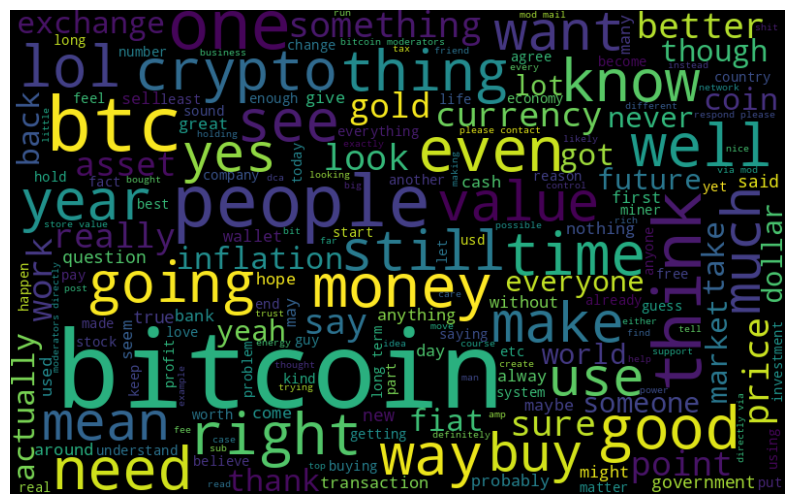

In [38]:
normal_words =' '.join([text for text in new_df['cleaned_body']
                        [new_df['sentiment_category'] == 'positive']])

# Set the path to a TrueType font file (e.g., Arial.ttf)
#font_path = "AROneSans-VariableFont_ARRR,wght.ttf"

# Generate the word cloud with the specified font path
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

* **Negative Words** 

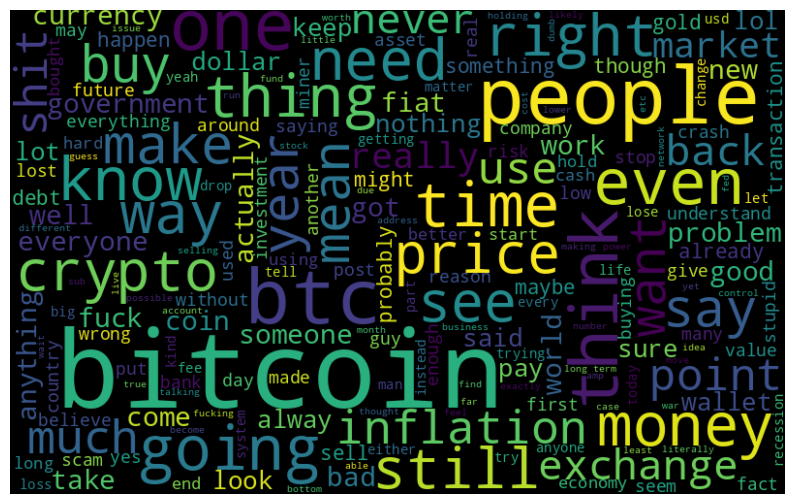

In [39]:
normal_words =' '.join([text for text in new_df['cleaned_body']
                        [new_df['sentiment_category'] == 'negative']])
 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

* **Neutral Words** 

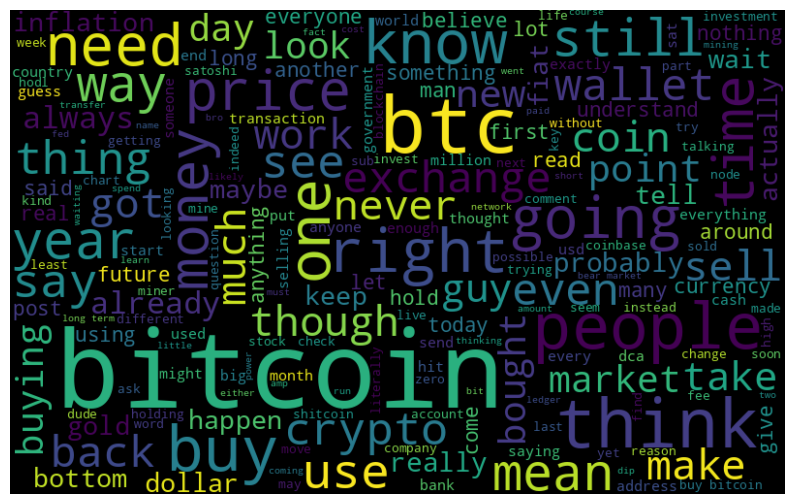

In [40]:
normal_words =' '.join([text for text in new_df['cleaned_body']
                        [new_df['sentiment_category'] == 'neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Insights from Word Clouds**

Observing the word clouds for different sentiment categories provides a preliminary insight into the discussions happening in the Bitcoin community:

- **Positive Comments:**
    - [Highlight any specific words or phrases that are notably prevalent.]
    - [Discuss potential reasons or contexts for these words being common in positive discussions.]

- **Negative Comments:**
    - [Highlight any specific words or phrases that stand out in the negative comments.]
    - [Discuss potential narratives or topics that might be causing negative discussions.]

- **Neutral Comments:**
    - [Identify and discuss any predominant words or phrases in neutral comments.]
    - [Consider why these words might be common in neutral discussions.]



Understanding the common words associated with different sentiment categories can assist in identifying patterns, prevalent topics, and community perceptions towards various aspects related to Bitcoin. 

In the upcoming sections, further exploratory data analysis will be performed to delve deeper into sentiment trends, temporal patterns, and potential correlations with other variables.


### Univariate Analysis

Univariate analysis explores one variable at a time, providing insights into its distribution, central tendency, dispersion, and shape. This form of analysis is crucial for:
- Understanding the basic characteristics, tendencies, and patterns within individual variables.
- Identifying outliers or anomalies that might warrant further investigation.
- Facilitating the selection and engineering of features in subsequent modeling stages.

In this section, we will delve into the univariate analysis of various variables within our dataset, exploring their distributions, identifying prevalent patterns, and making initial observations on their characteristics. The variables might include numerical features, such as sentiment scores, and categorical features, such as sentiments categories or specific words.


### i.) Distribution of the Sentiment Scores

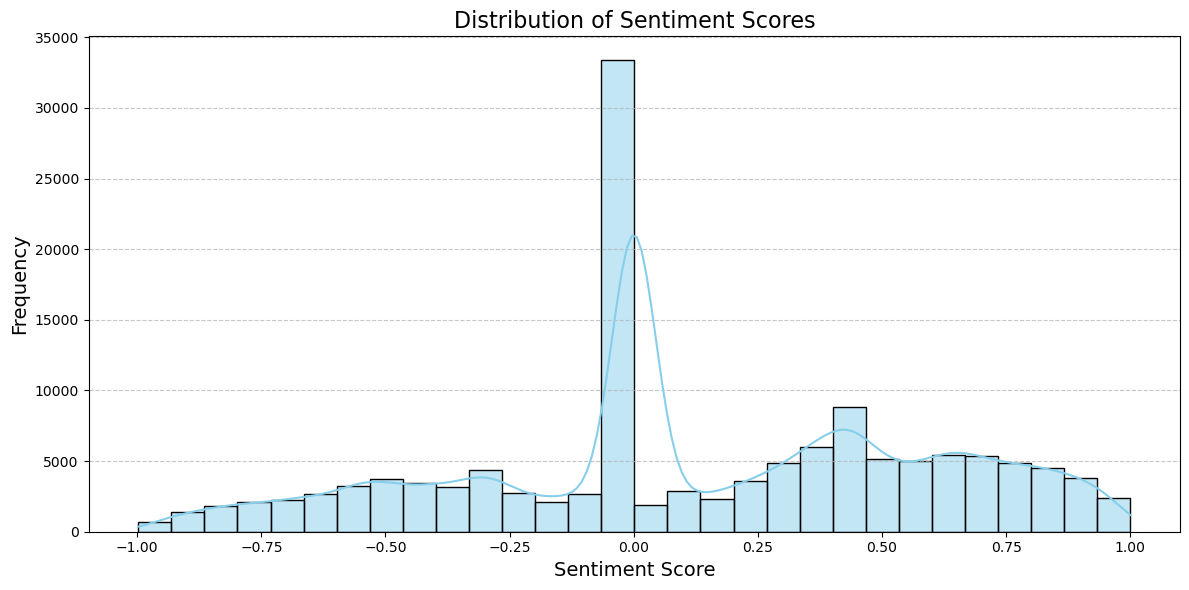

In [62]:
# Plotting a histogram for the sentiment scores
plt.figure(figsize=(12, 6))
sns.histplot(new_df['sentiment'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From the plot, we can observe:

- The majority of comments have a sentiment score close to 0, indicating a neutral sentiment.
- There's a notable peak near the -1 mark, suggesting a significant number of very negative comments.
- Similarly, there's a peak near the 1 mark, indicating a good number of very positive comments.

### ii.) Distribution of Comment and Post Scores

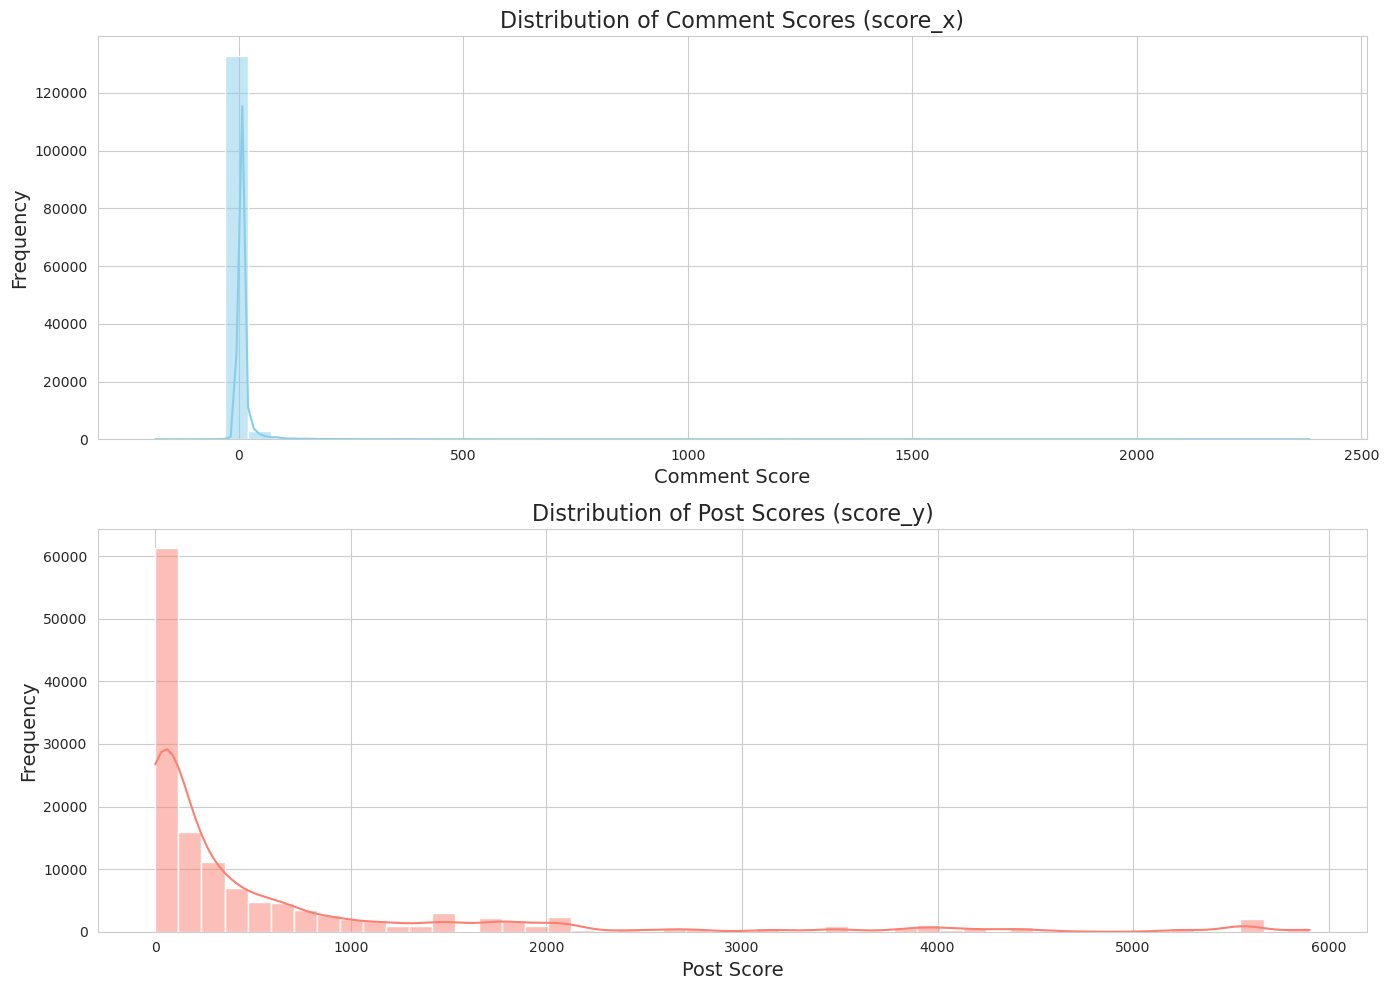

In [63]:
# Setting up the aesthetics
sns.set_style("whitegrid")

# Setting up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))

# Plotting the histograms
sns.histplot(new_df['score_x'], bins=50, ax=ax[0], color='skyblue', kde=True)
ax[0].set_title('Distribution of Comment Scores (score_x)', fontsize=16)
ax[0].set_xlabel('Comment Score', fontsize=14)
ax[0].set_ylabel('Frequency', fontsize=14)

sns.histplot(new_df['score_y'], bins=50, ax=ax[1], color='salmon', kde=True)
ax[1].set_title('Distribution of Post Scores (score_y)', fontsize=16)
ax[1].set_xlabel('Post Score', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

The histograms provide insights into the distributions of comment and post scores:

**Comment Scores (score_x):**

 - Most of the comments have scores close to 0, with a few exceptions that have higher scores.
The distribution appears to be right-skewed, meaning there are a few comments with exceptionally high scores.

**Post Scores (score_y):**

 - Similar to comment scores, most of the posts have scores close to 0, but there are some with higher scores.
This distribution is also right-skewed.

In our dataset, we have two score features: `score_x` and `score_y`, which might hold different scoring metrics related to the posts and comments. Understanding the distribution, central tendency, and spread of these scores can provide insights into:
- The general trend of scoring within the community.
- The presence of any outliers or abnormal scoring patterns.
- Potential correlations or disparities between `score_x` and `score_y`.

Below we calculate summary statistics for these features to get an overview of their distributions.


In [64]:
# Computing summary statistics for score_x and score_y
score_summary = new_df[['score_x', 'score_y']].describe()

score_summary

,score_x,score_y
count,136845.000000,136845.000000
mean,3.910073,644.188308
std,20.849492,1160.144192
min,-186.000000,0.000000
25%,1.000000,24.000000
50%,1.000000,151.000000
75%,3.000000,626.000000
max,2385.000000,5903.000000


The summary statistics provide the following insights:

**Comment Scores (score_x):**

Count: There are 168,030 comments in the dataset.

Mean: The average comment score is approximately 3.53.

Standard Deviation: The scores have a wide spread, with a standard deviation of approximately 19.3.

Min/Max: Comment scores range from -186 to 2385.

Medians & Quartiles: Half of the comments have scores of 1 or less. 75% of the comments have scores of 2 or less, indicating that very few comments receive exceptionally high scores.


**Post Scores (score_y):**

Count: There are 168,030 posts corresponding to the comments.

Mean: The average post score is approximately 637.14.

Standard Deviation: The scores have a spread with a standard deviation of approximately 1153.56.

Min/Max: Post scores range from 0 to 5903.

Medians & Quartiles: Half of the posts have scores of 151 or less. 75% of the posts have scores of 626 or less, suggesting a few posts receive exceptionally high scores.

### iii.) Frequency Distribution of the Top 10 Most Common Words

To comprehend the prevalent words and potential topics of discussion within the comments, it's pivotal to calculate the frequencies of each unique word. This analysis aims to:
- Identify the most frequently occurring words, which might indicate popular themes or subjects in the community discussions.
- Provide a foundation for subsequent analyses related to word prevalence, such as visualizing common words or exploring their association with sentiments.

In the following cell, we will:
- Tokenize the text data into individual words.
- Calculate the frequency of each unique word using the `Counter` class.


In [65]:
# Tokenizing the words
normal_words = ' '.join([text for text in new_df['cleaned_body']])                        
words = normal_words.split()

# Using Counter to count word frequencies
word_freq = Counter(words)


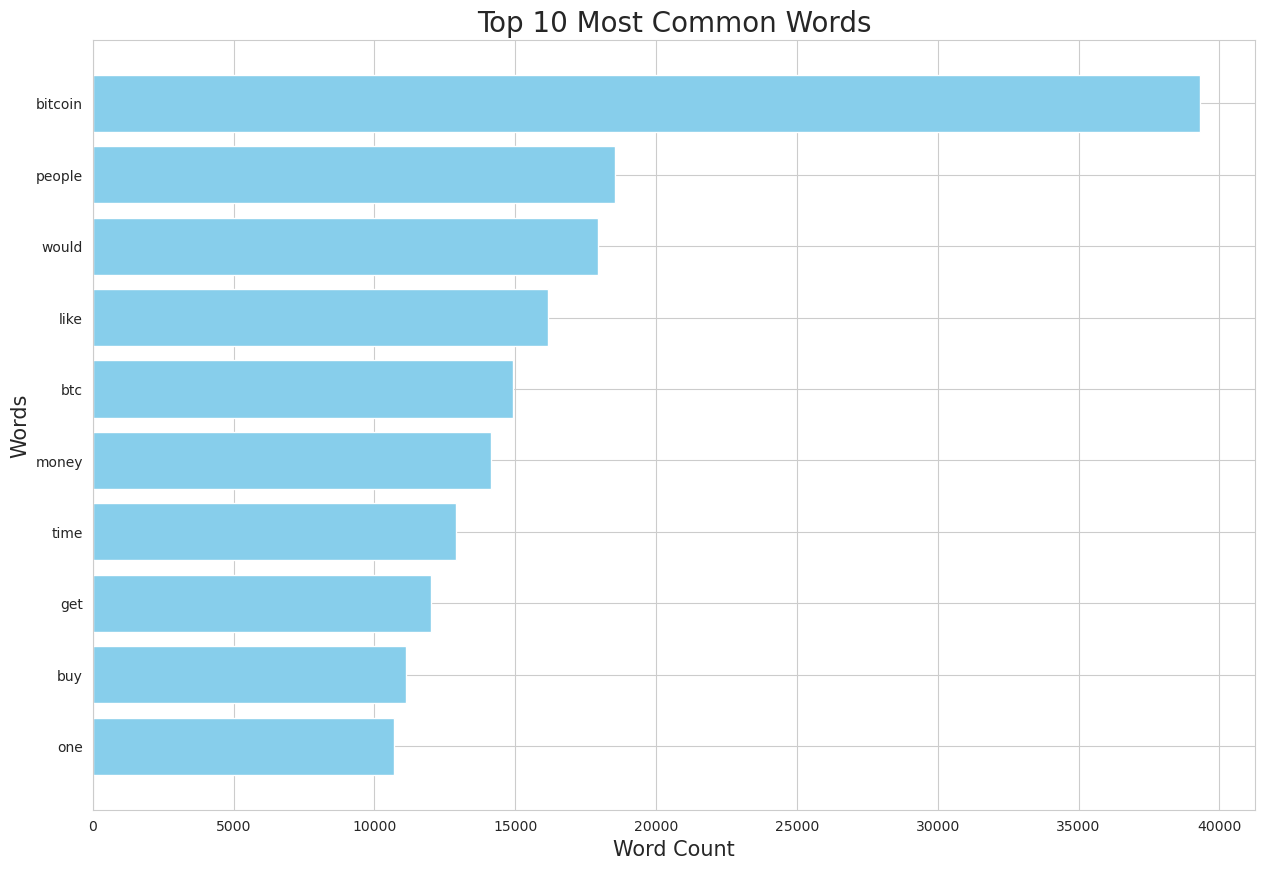

In [66]:
# Getting the 10 most common words
common_words = word_freq.most_common(10)

# Unzipping the words and their frequencies into two separate lists
words, counts = zip(*common_words)

# Plotting
plt.figure(figsize=(15,10))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Word Count', fontsize=15)
plt.ylabel('Words', fontsize=15)
plt.title('Top 10 Most Common Words', fontsize=20)
plt.gca().invert_yaxis()  # To display the word with the highest frequency at the top
plt.show()

### iv.) Frequency Distribution of the Top Words by Sentiment Category

Analyzing Word Frequencies Within Sentiment Categories:

To gain deeper insights into the language and terminologies prevalent within each sentiment category, we segregate the comments into 'positive', 'negative', and 'neutral' based on their sentiment categories, and analyze the word frequencies within each group. This analysis will enable us to:
- Understand the most common words within each sentiment category, potentially highlighting words that might be indicative or characteristic of the sentiment.
- Compare the prevalent words across different sentiment categories to identify unique and common terminologies.

In the following cell, we will:
- Segregate the comments based on their sentiment categories.
- Calculate the word frequencies within each sentiment category.
- Visualize a bar chart representing the top words and their frequencies within each sentiment category, providing a comparative view and insights into the language used within different sentiments.


In [67]:
# Splitting the dataframe by sentiment category
positive_texts = ' '.join(new_df[new_df['sentiment_category'] == 'positive']['cleaned_body'])
negative_texts = ' '.join(new_df[new_df['sentiment_category'] == 'negative']['cleaned_body'])
neutral_texts = ' '.join(new_df[new_df['sentiment_category'] == 'neutral']['cleaned_body'])

# Getting word frequencies for each category
positive_freq = Counter(positive_texts.split())
negative_freq = Counter(negative_texts.split())
neutral_freq = Counter(neutral_texts.split())

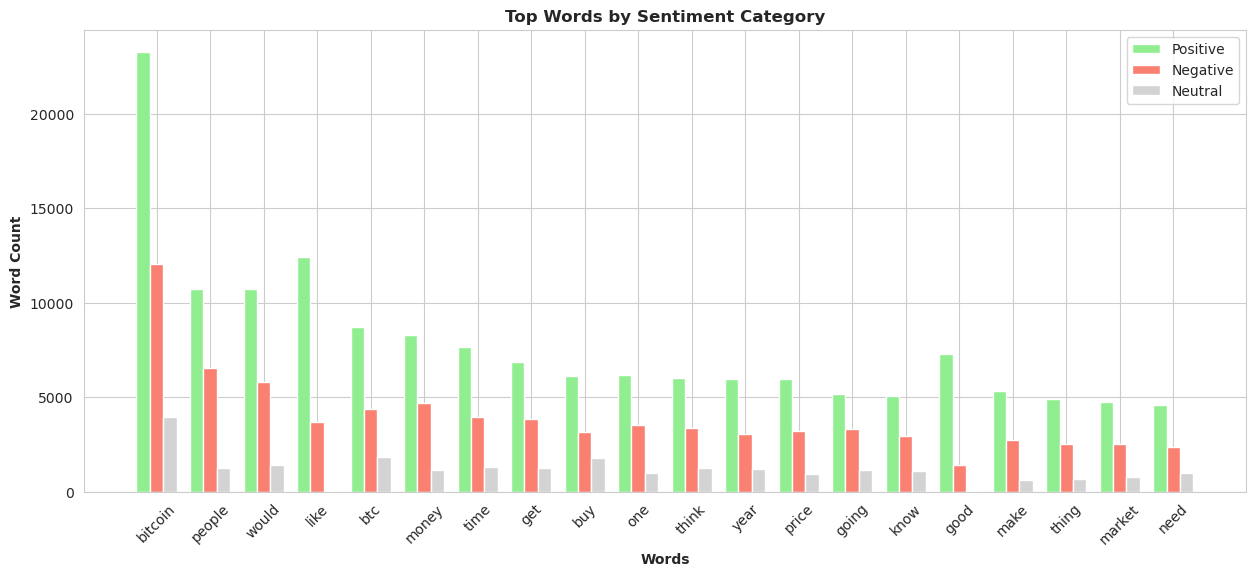

In [68]:
# Identify top words considering all categories
all_freq = positive_freq + negative_freq + neutral_freq
top_words = [word for word, _ in all_freq.most_common(20)]

# Fetch frequencies for these top words in each sentiment category
positive_counts = [positive_freq[word] for word in top_words]
negative_counts = [negative_freq[word] for word in top_words]
neutral_counts = [neutral_freq[word] for word in top_words]

# Plotting
bar_width = 0.25
r1 = range(len(top_words))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(15,6))

# Create bars
plt.bar(r1, positive_counts, width=bar_width, color='lightgreen', label='Positive')
plt.bar(r2, negative_counts, width=bar_width, color='salmon', label='Negative')
plt.bar(r3, neutral_counts, width=bar_width, color='lightgray', label='Neutral')

# Title & Subtitle
plt.title('Top Words by Sentiment Category', fontweight='bold')
plt.xlabel('Words', fontweight='bold')
plt.ylabel('Word Count', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(top_words))], top_words, rotation=45)

# Create legend & Show graphic
plt.legend()
plt.show()

- The bar chart represents the top words and their frequencies within positive, negative, and neutral sentiment categories.
- Certain words like [bitcoin], [money], and [time] appear prominently across different sentiment categories, potentially indicating general themes in the discussions.
- Some words might be more prevalent in a particular sentiment category, indicating a possible association with that sentiment.

It might be insightful to delve deeper into the contexts in which these words are used within different sentiment categories in the subsequent analyses. Exploring their usage over time and correlating with specific events or trends might also provide deeper insights into the discussions and sentiments within the community.


### v.) Distribution of the word "bitcoin" in Sentiment Categories

Visualizing the Prevalence of the Word "bitcoin" Across Sentiment Categories

Given the significance of the term "bitcoin" within the domain of this analysis, it is insightful to understand its prevalence within different sentiment categories. This visualization aims to:
- Identify the frequency of the term "bitcoin" within positive, negative, and neutral comments.
- Provide insights into whether discussions involving "bitcoin" are predominantly positive, negative, or neutral.

In the next cell, we will visualize a bar chart representing the counts of the word "bitcoin" within each sentiment category, offering insights into its usage across different sentiments.


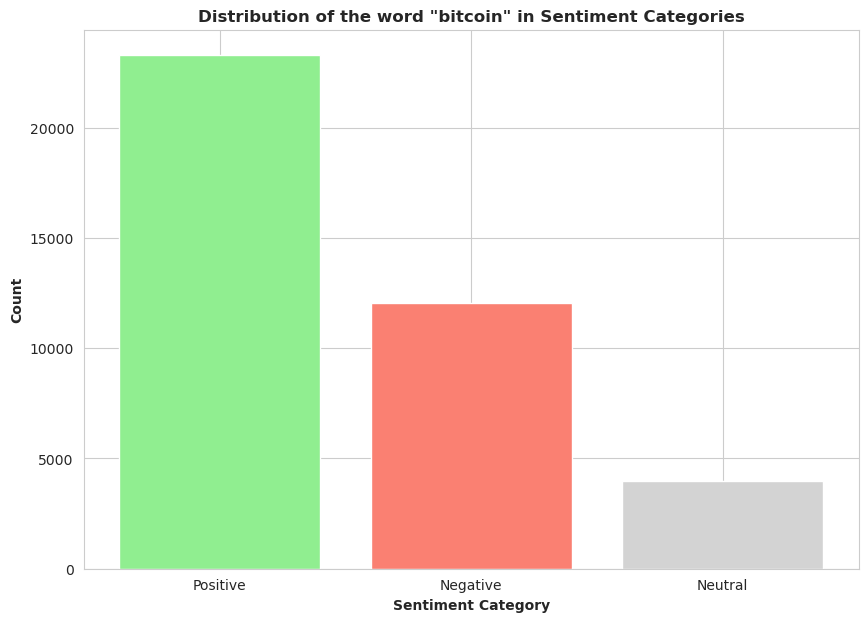

In [69]:
# Count occurrences of "bitcoin" in each sentiment category
positive_bitcoin_count = positive_texts.split().count('bitcoin')
negative_bitcoin_count = negative_texts.split().count('bitcoin')
neutral_bitcoin_count = neutral_texts.split().count('bitcoin')

# Data
categories = ['Positive', 'Negative', 'Neutral']
bitcoin_counts = [positive_bitcoin_count, negative_bitcoin_count, neutral_bitcoin_count]

# Plotting
plt.figure(figsize=(10,7))
plt.bar(categories, bitcoin_counts, color=['lightgreen', 'salmon', 'lightgray'])

# Title & Labels
plt.title('Distribution of the word "bitcoin" in Sentiment Categories', fontweight='bold')
plt.xlabel('Sentiment Category', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

plt.show()

Observations on the Prevalence of the Word "bitcoin":

- The bar chart showcases the counts of the word "bitcoin" within positive, negative, and neutral sentiment categories.
- The term "bitcoin" appears across all sentiment categories, indicating its significance within the community discussions.
- By comparing the counts we can note that the word "bitcoin" is more predominantly seen in a positive light, as compared to the negative, and neutral sentiments.


### vi.) Distribution of the Top Titles

Visualizing the Most Discussed Titles

Understanding the most prevalent titles in the discussions can offer insights into the topics that garner significant attention or are widely discussed within the community. Visualizing the top titles and their counts will enable us to:
- Identify the titles that are frequently occurring, potentially indicating popular or recurring topics.
- Understand the breadth of discussions and themes that are prevalent within the dataset.

In the subsequent cell, a bar chart will be visualized, showcasing the top titles along with their respective counts, offering a snapshot of the prevalent discussions within the community.


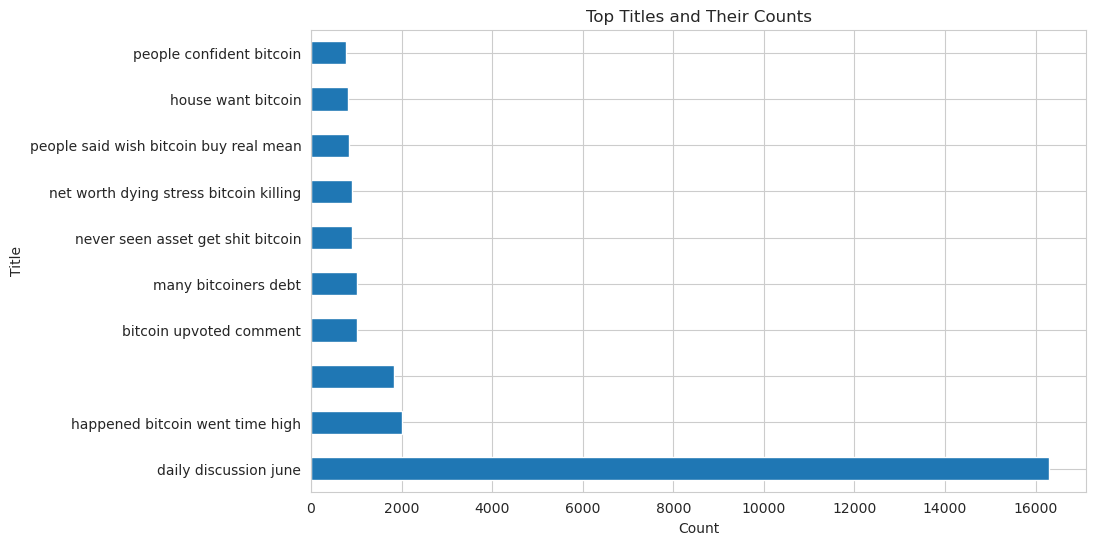

In [70]:
Title_unique = new_df['cleaned_title'].value_counts()

# Plot the unique title counts horizontally
plt.figure(figsize=(10, 6))
Title_unique[:10].plot(kind='barh')  # Use 'barh' for horizontal bar plot
plt.title('Top Titles and Their Counts')
plt.ylabel('Title')
plt.xlabel('Count')
plt.show()

Observations from Top Titles Visualization

- The bar chart depicts the top titles and their respective counts, providing a visual understanding of the most discussed titles within the dataset.
- Titles such as 'daily discussion june', 'happened bitcoin went time high', and 'bitcoin upvoted comment' appear to be quite prevalent, indicating them as notable topics of discussion within the community.
- Understanding the contexts and sentiments associated with these prevalent titles might offer deeper insights into the nature and themes of the discussions.


### Bivariate Analysis

In this section, we will perform bivariate analyses to explore the relationships and interactions between different pairs of variables within our dataset. Bivariate analysis can provide insights into:
- Potential correlations or associations between variables.
- Identifying patterns or trends occurring between variable pairs.
- Exploring how variables might influence each other within different contexts or conditions.

The analyses will involve exploring associations between sentiment scores and other variables, investigating how sentiments and discussions evolve over time, and examining how different variables might interplay with each other within different contexts or conditions.


### i.) Visualizing Daily Average Sentiment Over Time

Understanding the temporal trends in the average sentiment of comments and posts can provide insights into the mood and sentiments of the community over time. This visualization aims to:
- Represent how the average sentiment has fluctuated over time, both for comments and posts.
- Potentially correlate these temporal trends with external events or internal discussions within the community.

In the subsequent cells, we will visualize line plots representing the daily average sentiment for:
- Comments: Providing insights into how the sentiment within the comment discussions has evolved daily.
- Posts: Offering a perspective on how the sentiment within the posted content has changed daily.


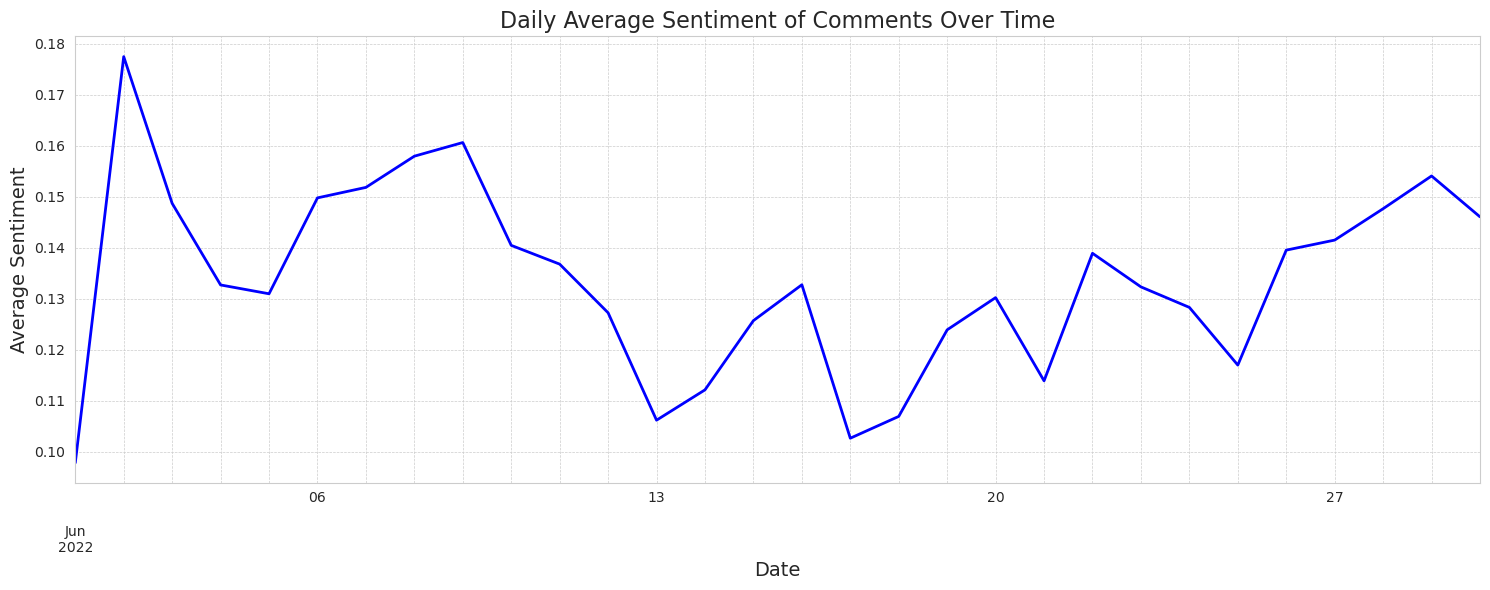

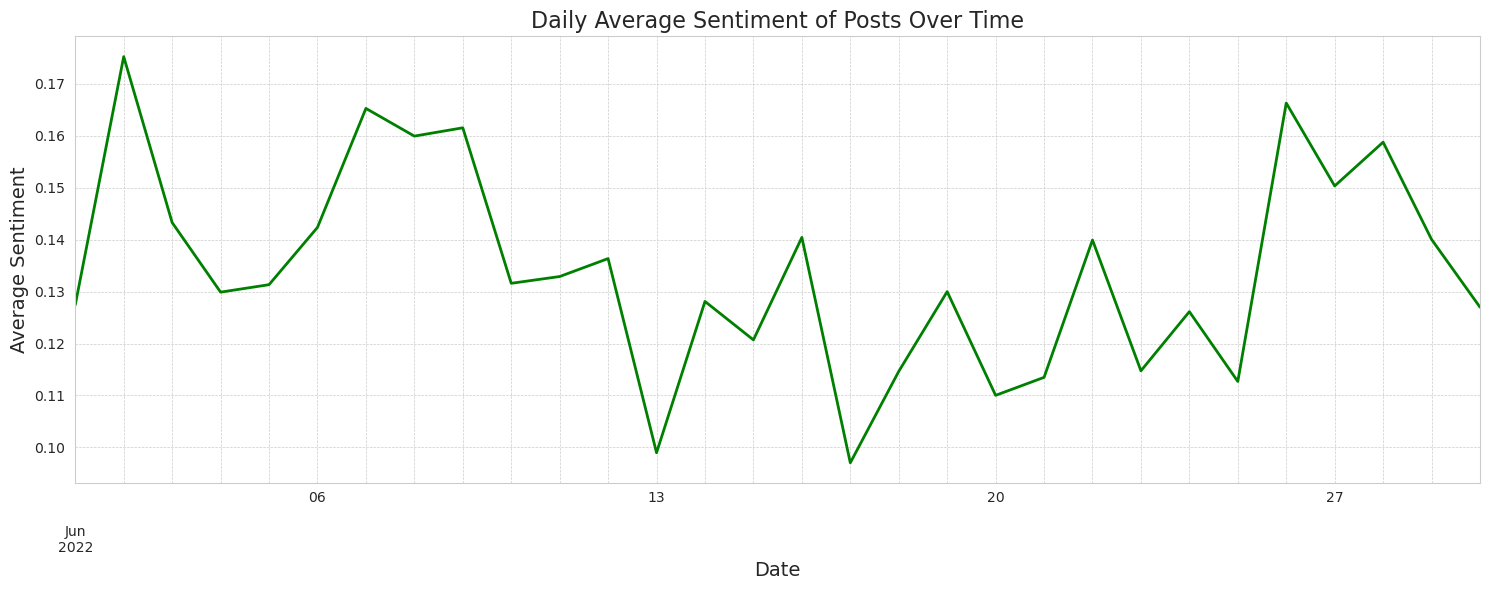

In [71]:
# Resampling data to get daily average sentiment for comments
plt.figure(figsize=(15, 6))
new_df.resample('D', on='date_comments').mean()['sentiment'].plot(linewidth=2, color='blue')
plt.title('Daily Average Sentiment of Comments Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Sentiment', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Resampling data to get daily average sentiment for posts
plt.figure(figsize=(15, 6))
new_df.resample('D', on='date_posts').mean()['sentiment'].plot(linewidth=2, color='green')
plt.title('Daily Average Sentiment of Posts Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Sentiment', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Observations on Daily Average Sentiment:

- The line plots represent the temporal trends in the daily average sentiment for comments (blue line) and posts (green line), providing a visual representation of the fluctuations in sentiment over time.
- Peaks and troughs in the line plots might correspond to specific events or discussions that influenced the sentiments within the community.
- Comparing these trends with external events, market behaviors, or internal discussions might offer deeper insights into factors influencing the sentiments.

In the subsequent sections, we may explore specific events or periods where significant fluctuations in sentiment are observed and delve deeper into the discussions, words, and contexts that influenced these temporal trends in sentiment.


### ii.) Visualizing the Distribution of Sentiment Scores Across Sentiment Categories

Understanding the spread and distribution of sentiment scores within each sentiment category (Positive, Negative, and Neutral) is pivotal for:
- Observing the central tendency of sentiment scores within each category.
- Identifying potential outliers or extreme values in the sentiment scores.
- Analyzing the dispersion and variability of sentiment scores within and across categories.

In the next cell, a boxplot will be visualized, providing a graphical representation of the distribution of sentiment scores within each sentiment category, offering insights into their centrality, spread, and potential outliers.


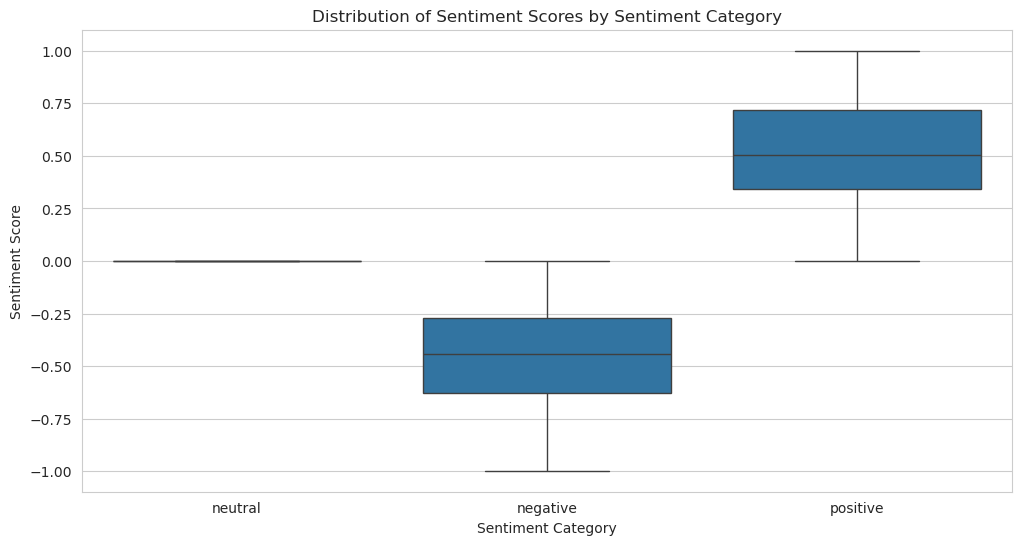

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=new_df, x='sentiment_category', y='sentiment')
plt.title('Distribution of Sentiment Scores by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Score')
plt.show()

Observations on Sentiment Score Distribution

- The boxplot provides a visual representation of the distribution of sentiment scores across the Positive, Negative, and Neutral sentiment categories.
- Observations on the median (central line within the box), interquartile range (height of the box), and potential outliers (points beyond the whiskers) can be noted for each sentiment category.
- Specific observations related to the spread and outliers within each category, and comparisons across categories, can provide insights into the nature and variability of sentiments within the discussions.


### Multivariate Analysis

In this section, we will conduct multivariate analyses, exploring relationships, patterns, and interactions between multiple variables simultaneously. Engaging in multivariate analysis allows us to:
- Examine the interactions and associations between different features.
- Investigate how multiple variables influence each other and potentially affect sentiments.
- Explore complex patterns and structures within the data that might not be discernible through univariate or bivariate analyses.

We'll delve into various multivariate analyses, exploring how different features interact with each other and potentially influence sentiments and discussions within the community. This might involve exploring temporal trends involving multiple variables, investigating associations between words, sentiments, and other features.


### i.) Visualizing Average Sentiment and Post Score by Day of the Week

Analyzing the average sentiment and post scores across different days of the week can provide insights into weekly trends and patterns in the discussions and interactions within the community. In this analysis, we aim to:
- Explore whether certain days of the week exhibit different average sentiments and post scores.
- Identify any patterns or trends that suggest a weekly cycle in sentiment or post popularity.

We will visualize a bar plot, representing:
- Average sentiment across different days of the week, providing insights into whether the collective mood varies by day.
- Average post scores across different days of the week, offering a perspective on whether post popularity shows a weekly trend.


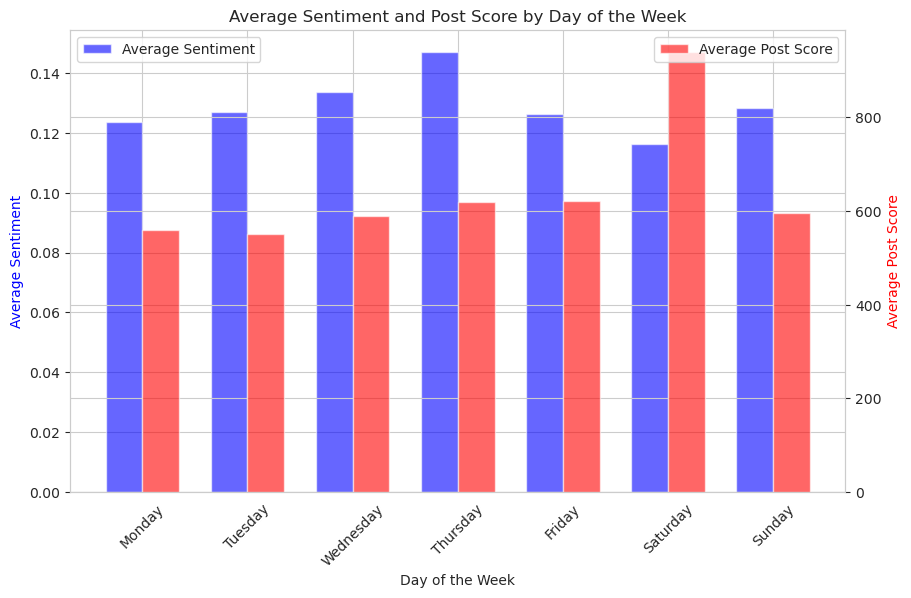

In [73]:
# Extracting day of the week
new_df['day_of_week'] = new_df['date_comments'].dt.day_name()

# Grouping by day of the week and calculating mean
grouped = new_df.groupby('day_of_week')[['sentiment', 'score_y']].mean().reset_index()

# Setting the order for days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped['day_of_week'] = pd.Categorical(grouped['day_of_week'], categories=days_order, ordered=True)
grouped = grouped.sort_values('day_of_week')

# Plotting
bar_width = 0.35
index = np.arange(len(days_order))

fig, ax1 = plt.subplots(figsize=(10, 6))

# Twin axes
ax2 = ax1.twinx()

# Bars for sentiment
bars1 = ax1.bar(index, grouped['sentiment'], bar_width, label='Average Sentiment', color='b', alpha=0.6)

# Bars for post score
bars2 = ax2.bar(index + bar_width, grouped['score_y'], bar_width, label='Average Post Score', color='r', alpha=0.6)

# Labels and title
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Average Sentiment', color='b')
ax2.set_ylabel('Average Post Score', color='r')
ax1.set_title('Average Sentiment and Post Score by Day of the Week')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(days_order, rotation=45)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


Observations on Average Sentiment and Post Score by Day of the Week:

- The bar plot represents the average sentiment and post score across different days of the week, revealing any weekly trends in the data.
- Observations on whether certain days consistently exhibit higher or lower average sentiments and post scores can be drawn from the plot.
- Any discernible patterns that suggest a weekly cycle in sentiment or post popularity can be noted and further explored.


## Data Preprocessing

In this section, we will focus on preprocessing the data, ensuring it is cleaned, structured, and formatted appropriately for subsequent analyses and modeling. Effective data preprocessing is vital for:
- Ensuring the quality and accuracy of the data, mitigating any issues related to missing, inconsistent, or outlier values.
- Preparing and engineering features that can effectively contribute to subsequent analyses and predictive modeling.
- Enhancing the performance and accuracy of any applied machine learning models.

We will engage in various data preprocessing steps, such as label encoding the target variable, normalizing numerical variables, and potentially engineering new features that can enhance our analyses and models.


### Text Vectorization Techniques

In order to facilitate effective analysis and modeling of textual data, it is pivotal to convert the text into a numerical format that can be interpreted and processed by machine learning algorithms. We will explore and potentially utilize the following text vectorization techniques:

  - **TF-IDF (Term Frequency-Inverse Document Frequency):**
    - Convert text data into numerical vectors, emphasizing words that are unique to particular documents.

  - **Word2Vec:**
    - Generate dense vector representations of words, capturing semantic meanings based on contextual usage.

  - **Doc2Vec:**
    - Generate vector representations for entire documents or sentences, capturing the contextual and semantic information where understanding the semantic context of entire texts is crucial.


### 1. TF-IDF Vectorization

- In this section, we will employ the TF-IDF vectorization method, which transforms the text data into numerical vectors while considering the importance of each term in relation to the entire dataset based on its uniqueness.

  - **Term Frequency (TF):** Measures the frequency of a word in a document.
  - **Inverse Document Frequency (IDF):** Dampens the weight of words that occur frequently across all documents.


In [81]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the vectorizer on our corpus
tfidf_vectors = tfidf_vectorizer.fit_transform(new_df['cleaned_body'])

# Convert the TF-IDF vectors into a DataFrame
# tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_vectors

<136845x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1627292 stored elements in Compressed Sparse Row format>

- The `TfidfVectorizer` has been initialized and applied to the `cleaned_body` text data, transforming it into a sparse matrix of TF-IDF vectors.
- As opposed to converting the sparse matrix into a dense format, which might consume a lot of memory for a large dataset, we will use the vectors as a sparse matrix. This saves memory by only storing the non-zero parts of our feature vectors.
- The parameter `max_features=5000` has been set, limiting the output to the top 5000 most frequent terms in the vectorized output.


In subsequent steps, these TF-IDF vectors will serve as input features for our models, exploring the relationship between text data and target variables.


### 2. Word2Vec embeddings

Word2Vec is a word embedding technique that represents words in dense vector spaces. The model learns to associate words based on their contextual usage, capturing semantic meanings and relationships between words. In this section, we will leverage the Word2Vec model to:
- Convert words in our corpus into vector representations that capture semantic meanings.
- Explore semantic relationships and similarities between different words in the corpus.


Below, we will implement and train a Word2Vec model to generate word embeddings for our textual data by doing the following:

- **Tokenization:** The cleaned text data is tokenized into words, forming the input for the Word2Vec model.
- **Word2Vec Training:** The model is trained on the tokenized text, learning to represent words as vectors based on their contextual usage.
- **Document Vectors:** We will calculate a vector for each document by averaging the Word2Vec vectors of all words in the document.


In [82]:
# Set a random seed for reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)

# Tokenize the cleaned text
tokenized_text = new_df['cleaned_body'].apply(lambda x: x.split())

# Train Word2Vec model with a fixed seed
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4, seed=seed)

# Function to calculate the vector for a document by averaging the vectors of the words in the document
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv.key_to_index]
    
    # If no words of the doc are in the word2vec vocab, return a vector of zeros
    if len(doc) == 0:
        return np.zeros(word2vec_model.vector_size)
    
    # Otherwise, get the mean of the vectors
    return np.mean(word2vec_model.wv[doc], axis=0)

# Apply function to calculate vectors for all documents
word2vec_vectors = tokenized_text.apply(lambda x: document_vector(word2vec_model, x))
word2vec_df = pd.DataFrame(word2vec_vectors.tolist())


In [83]:
word2vec_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.397158,0.996502,-0.067611,0.674660,-1.459750,-0.451276,0.272317,-0.346473,-0.436441,0.863052,...,0.168749,0.340168,0.217359,-1.264970,-0.089951,0.364576,0.421959,-0.301505,0.572846,-1.442946
1,0.229352,-0.022902,0.070966,-0.203943,-0.264096,0.227550,0.113578,-0.109852,-0.263660,-0.141561,...,-0.181933,0.763428,0.313600,-0.232618,0.117168,0.169187,0.117005,-0.037759,-0.453518,0.043279
2,0.137321,-0.001583,-0.510485,0.408800,-0.228023,-0.334843,0.175962,-0.402796,-0.402247,0.872637,...,-0.205412,1.591008,0.091927,0.054596,0.440496,1.083587,0.502195,0.391028,-0.418710,-0.388762
3,0.331532,-0.490860,-0.545584,0.294720,-0.293358,0.448187,0.721257,0.019863,-0.492445,-0.159246,...,-0.054023,0.941996,-0.126434,0.099800,0.555725,0.192953,0.365323,-0.089264,-0.710120,0.385418
4,-0.259361,0.111232,-1.233059,-0.069628,-0.670730,-0.895528,0.588415,0.188401,-0.596215,-0.357785,...,0.349779,0.877819,0.041278,-0.300940,0.324989,-0.010064,-0.307623,0.768350,-0.119088,-0.126716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136840,-0.363983,-0.342334,-0.535996,0.481255,-0.027967,-0.438542,0.522918,-0.313573,-0.555731,0.276200,...,-0.570756,0.986628,0.724245,-0.020471,0.205064,0.306627,0.025417,-0.166200,-0.669239,-0.047713
136841,-0.304153,-0.926789,-1.092099,0.636563,-0.309125,-0.393738,1.009347,-0.509626,-0.731946,0.497949,...,-0.379576,1.340735,0.284777,0.097019,0.887052,0.597817,0.504597,0.631029,-0.584688,-0.343387
136842,-0.115092,-0.481208,-0.494413,0.213254,-0.614698,-0.147542,0.609218,-0.005329,-0.503993,0.060188,...,-0.437039,1.021272,0.013063,0.256786,0.387860,0.156408,-0.136852,0.694110,-0.211759,-0.144265
136843,0.280150,-0.080250,-0.069560,-0.119537,0.097352,0.216471,0.454229,0.016522,-0.436283,-0.436021,...,-0.990773,1.407592,-0.769285,0.043276,0.851229,0.481081,0.717189,0.151649,-0.349241,0.671387


- Document vectors have been calculated by averaging the word vectors of the constituent words, providing a numerical representation of each document that can be used for further analysis and modeling.
- We have a total of 136,845 documents, each represented by a 100-dimensional vector.

In the upcoming sections, we will also utilize these Word2Vec embeddings in our modeling.


### 3. Doc2Vec Embeddings

After exploring Word2Vec embeddings, we now turn our attention to Doc2Vec – a model that generates vector representations for entire documents or sentences. The implementation of Doc2Vec allows us to capture the semantic meanings and relationships within the entirety of the text data, which can be utilized for further semantic analysis and modeling.

In this section, we will:
- Tokenize the cleaned text into words, which will serve as input for the Doc2Vec model.
- Create tagged documents, associating each document with a unique tag/identifier.
- Train the Doc2Vec model on our text data.
- Infer document vectors for our corpus using the trained model.


In [84]:
# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)

# Tokenize the cleaned text
tokenized_text = new_df['cleaned_body'].apply(lambda x: x.split())

# Create tagged documents
tagged_data = [TaggedDocument(words=_d, tags=[str(i)]) for i, _d in enumerate(tokenized_text)]

# Train Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=10, seed=seed)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# Infer the vectors to be used in training and testing
doc2vec_vectors = [doc2vec_model.infer_vector(words) for words in tokenized_text]
doc2vec_df = pd.DataFrame(doc2vec_vectors)


In [85]:
doc2vec_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.048077,0.042251,-0.049751,-0.005819,-0.102736,-0.022027,-0.014316,-0.042562,-0.044962,0.011498,...,-0.016701,0.090856,0.033227,-0.010109,-0.020445,0.026907,0.020581,0.022031,-0.035383,-0.003453
1,0.077830,-0.004495,0.030610,-0.000858,-0.042356,-0.020343,0.069933,-0.075636,-0.033851,-0.054500,...,-0.028474,0.090318,0.076008,0.029079,0.084056,-0.004552,0.074462,-0.001879,-0.076506,0.034868
2,0.044455,0.038933,-0.007244,0.036474,0.012320,-0.032576,0.013394,0.020763,0.053144,0.017597,...,-0.075952,0.022381,-0.027149,-0.015305,0.009668,0.022776,0.056297,0.000078,-0.020193,-0.000927
3,-0.019535,-0.047693,-0.103375,0.015366,0.053442,0.012111,0.048316,-0.018305,-0.028861,0.049379,...,0.014079,-0.025282,0.008880,0.094312,0.040085,-0.023237,0.080023,-0.026914,-0.039963,-0.020158
4,0.047271,-0.052980,-0.153895,-0.048832,-0.147732,0.085920,0.074210,0.087769,-0.035639,-0.176527,...,-0.105246,0.179269,0.121458,-0.052916,-0.080090,0.045002,-0.019439,0.021676,-0.070530,0.089105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136840,0.107433,0.032991,-0.014602,0.015621,-0.065424,0.045446,0.076113,0.028933,-0.013583,0.078100,...,-0.032312,0.057785,0.034245,0.007034,0.031100,0.007543,-0.028591,0.079657,-0.012563,-0.037420
136841,-0.013218,-0.008177,0.035682,0.041372,-0.011172,-0.021121,0.030251,0.043215,-0.056574,0.016472,...,-0.048846,0.045566,0.030682,-0.018748,0.026850,-0.071402,0.019844,0.002460,0.040866,-0.016430
136842,-0.160425,-0.252996,-0.016990,-0.019478,0.023518,-0.047563,0.276666,0.047090,-0.078455,0.057870,...,-0.059039,0.134413,-0.049017,-0.116866,-0.016512,-0.033097,0.064884,-0.096776,-0.122781,0.038980
136843,0.027966,0.030561,-0.038832,0.040935,-0.062366,-0.009502,0.021340,0.003768,-0.048007,0.024638,...,-0.004388,0.103330,0.017357,0.000909,-0.007603,0.058864,-0.004044,0.056018,-0.018286,-0.034937


- The `doc2vec_df` DataFrame holds the Doc2Vec embeddings of the documents in our dataset, with each row representing a document and columns representing the dimensions of the embedding space.
- We have a total of 136,845 documents, each represented by a 100-dimensional vector in the `doc2vec_df`.

In the following sections, we will leverage these Doc2Vec embeddings in our predictive modeling.


# 4.0 Modeling

Having meticulously pre-processed our data and engineered valuable features, we transition to the modeling phase of our analysis. In this section, we will build and evaluate models utilizing the diverse feature sets prepared in the preceding sections: TF-IDF, Word2Vec embeddings, and Doc2Vec embeddings. Our objective is to leverage these features to build models that can accurately analyze and predict aspects of our text data.

We will explore the application of various machine learning and deep learning algorithms, each providing unique approaches and capabilities in handling text data:

1. **Multinomial Naive Bayes:** A probabilistic classifier that leverages Bayes' theorem, adept for classification tasks with discrete features like text data.
2. **RandomForest:** An ensemble learning method that operates by constructing a multitude of decision trees and outputs the class that is the mode of the classes.
3. **XGBoost:** An optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable.
4. **LSTM (Long Short-Term Memory):** A type of recurrent neural network (RNN) that can capture sequential patterns and dependencies in sequence data like text.
5. **Transfer Learning (Transformers):** Utilizing pre-trained models (such as Transformer models) and fine-tuning them for our specific task to leverage learned patterns from large-scale datasets.

Through the utilization of these algorithms, we aim to explore, analyze, and compare their performance and capabilities in modeling our text data. Subsequent sections will delve into the implementation, tuning, and evaluation of these models, extracting insights and identifying the model that offers the optimal balance of performance and interpretability.


**Defining a Function for Model Training**

For the purpose of streamlining our modeling process, we define a function `train_and_evaluate` to facilitate the training and evaluation of our models with various feature sets (`tfidf_df`, `word2vec_df`, and `doc2vec_df`) and different machine learning algorithms.

 This function is crafted to handle:
- **Data Splitting:** Segmenting the data into training and testing sets.
- **Model Training:** Fitting the model on the training data.
- **Predictions:** Generating predictions on both training and testing data.
- **Evaluation:** Assessing the model performance using various metrics (Accuracy, F1 Score, ROC-AUC Score).
- **Classification Reports:** Providing detailed performance reports for each class.
- **Metrics Storage:** Compiling the metrics in a structured format for further analysis and comparison.


This function enhances the efficiency and consistency of the modeling process, ensuring that models are trained and evaluated under uniform conditions, thereby enhancing the validity of our comparative analyses.

In [86]:
# Define a function for modeling
def train_and_evaluate(model, X, y, test_size=0.2):
    """
    Train and evaluate a machine learning model.

    :param model: model object
    :param X: Features
    :param y: Target variable
    :param test_size: Fraction of dataset to be used as test set
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Check if the model is a classifier
    if not is_classifier(model):
        raise ValueError("Model is not a classifier")

    # Create a pipeline with a scaler, SMOTE, and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler(with_mean=False)),  # Use with_mean=False to support sparse input
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    # Measure the training time
    start_time = time.time()

    # Train the model
    pipeline.fit(X_train, y_train)

    # Record the end time
    end_time = time.time()

    # Calculate the training time
    training_time = end_time - start_time
    print("Training time:", training_time, "seconds")
    print("\n")

    # Predictions
    train_preds = pipeline.predict(X_train)
    test_preds = pipeline.predict(X_test)

    # Probability estimates for each class
    train_preds_proba = pipeline.predict_proba(X_train)
    test_preds_proba = pipeline.predict_proba(X_test)

    # Evaluation
    print("Model Performance")
    print("------------------")

    # Train Metrics
    train_accuracy = accuracy_score(y_train, train_preds)
    train_f1 = f1_score(y_train, train_preds, average='weighted')
    train_roc_auc = roc_auc_score(y_train, train_preds_proba, multi_class='ovr', average='weighted')

    print("Train Accuracy: ", train_accuracy)
    print("Train F1 Score: ", train_f1)
    print("Train ROC-AUC Score: ", train_roc_auc)
    print("\nClassification Report (Train Data):\n", classification_report(y_train, train_preds))

    # Test Metrics
    test_accuracy = accuracy_score(y_test, test_preds)
    test_f1 = f1_score(y_test, test_preds, average='weighted')
    test_roc_auc = roc_auc_score(y_test, test_preds_proba, multi_class='ovr', average='weighted')

    print("\nTest Accuracy: ", test_accuracy)
    print("Test F1 Score: ", test_f1)
    print("Test ROC-AUC Score: ", test_roc_auc)
    print("\nClassification Report (Test Data):\n", classification_report(y_test, test_preds))

    # Create a DataFrame to store the metrics
    metrics_df = pd.DataFrame({
        'Model': [str(model)],
        'Train_Accuracy': [train_accuracy],
        'Train_F1': [train_f1],
        'Train_ROC_AUC': [train_roc_auc],
        'Test_Accuracy': [test_accuracy],
        'Test_F1': [test_f1],
        'Test_ROC_AUC': [test_roc_auc],
        'Training_Time': [training_time]
    })

    return pipeline, metrics_df

- The `train_and_evaluate` function is designed to handle the complete modeling process from training to evaluation, ensuring consistency and efficiency in our analyses.
- Utilizing a pipeline, the function integrates scaling, SMOTE for handling class imbalance, and model training in a coherent sequence.
- Performance metrics such as Accuracy, F1 Score, and ROC-AUC Score are calculated for both training and testing data, providing insights into the model's capability to generalize.
- Detailed classification reports offer insights into the model's performance across different classes, vital for multi-class classification tasks.
- A DataFrame (`metrics_df`) is returned, compiling all relevant metrics, facilitating easy comparison and analysis of different models and feature sets.

With this function defined, we can seamlessly train and evaluate models using various algorithms and feature sets, ensuring a structured and comparative approach to our modeling analyses. In the following sections, we will utilize this function to explore different modeling paradigms and identify models that offer optimal performance on our text data.


### 1. Multinomial Naive Bayes

- **TF-IDF Features**

In this section, we will explore the implementation and evaluation of the Multinomial Naive Bayes model, utilizing the TF-IDF feature set as input. The Multinomial Naive Bayes model is particularly popular for text classification tasks due to its simplicity, efficiency, and effectiveness in handling discrete data like word counts or frequencies (as produced by TF-IDF).


 Below, we will:
- **Label Encode** the target variable (`'sentiment_category'`) to convert the categorical labels into numerical format, facilitating compatibility with machine learning algorithms.
- **Validate Consistency** between the feature set and target variable by ensuring their shapes match, confirming that each instance in our feature set corresponds to a target label, ensuring that our data is well-aligned for modeling.


In [87]:
# Label encoding the target variable
le = LabelEncoder()
new_df['encoded_sentiment'] = le.fit_transform(new_df['sentiment_category'])

# Ensure the shapes match
print(tfidf_vectors.shape[0] == new_df['encoded_sentiment'].shape[0])


True


With the data appropriately prepared, we will proceed to utilize the `train_and_evaluate` function to train and evaluate the Multinomial Naive Bayes model using the TF-IDF features.
This model assumes that the features (word frequencies) are generated from a multinomial distribution and is particularly suitable for discrete data like our TF-IDF vectors.


In [88]:
# Splitting the data
X = tfidf_vectors  # Features (TF-IDF values)
y = new_df['encoded_sentiment']  # Target variable

# Instantiate and train MultinomialNB
nb_model = MultinomialNB()
trained_nb_model, nb_metrics = train_and_evaluate(nb_model, X, y)


Training time: 165.4399585723877 seconds


Model Performance
------------------
Train Accuracy:  0.7327450765464577
Train F1 Score:  0.7339379657082662
Train ROC-AUC Score:  0.8539824747927696

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.66      0.69      0.67     30633
           1       0.68      0.81      0.74     25366
           2       0.82      0.72      0.76     53477

    accuracy                           0.73    109476
   macro avg       0.72      0.74      0.73    109476
weighted avg       0.74      0.73      0.73    109476


Test Accuracy:  0.6968102597829662
Test F1 Score:  0.6985877865047214
Test ROC-AUC Score:  0.8143242292054976

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.62      0.65      0.63      7645
           1       0.64      0.75      0.69      6204
           2       0.79      0.70      0.74     13520

    accuracy          

In [89]:
nb_metrics

,Model,Train_Accuracy,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_F1,Test_ROC_AUC,Training_Time
0,MultinomialNB(),0.732745,0.733938,0.853982,0.69681,0.698588,0.814324,165.439959


**Observations on the Performance**

From the derived metrics, we can analyze how well the model generalizes to unseen data and its effectiveness in classifying each sentiment class. 

Multinomial NB will serve as a baseline as we explore additional models and feature sets in the following sections, allowing for comparative analysis to identify the most effective modeling approach for our data.

- **Accuracy**:
    - **Train Accuracy: 73.27%**
    - **Test Accuracy: 69.68%**
    The accuracy metric provides a straightforward measure of the overall correctness of the model's predictions. The small difference between training and testing accuracy suggests that the model is somewhat fit to the training data.

- **F1 Score**:
    - **Train F1 Score: 73.39%**
    - **Test F1 Score: 69.86%**
    The F1 Score, which balances precision and recall, reflects the model’s capability to maintain a harmonious trade-off between false positives and false negatives. A relatively high F1 score both for the train and test sets indicates that the model manages to achieve a reasonable balance.

- **ROC-AUC Score**:
    - **Train ROC-AUC Score: 85.40%**
    - **Test ROC-AUC Score: 81.43%**
    The ROC-AUC Score signifies the model's ability to distinguish between the different sentiment classes. A score above 80% for both training and testing data suggests that the model has a good discriminative power, and the small gap between training and testing scores indicates a somewhat good fit to the training data.


**Key Takeaway**:
- The model exhibits fair performance across metrics and is somewhat well fit to the data, as indicated by the small discrepancies between training and testing scores.


In subsequent sections, we will explore different modeling approaches and feature sets, comparing their performances to the Multinomial Naive Bayes model and identifying which strategy yields optimal results for our sentiment classification task.

- Also, MultinomialNB inherently does not accommodate negative values, which are present in the `word2vec_df` and `doc2vec_df` dataframes.
- We will therefore skip modeling these two feature sets with the MultinomialNB model.


### 2. Random Forest

- **TF-IDF Features**

Random Forest, being an ensemble learning method, combines multiple decision trees to enhance predictive accuracy and control over-fitting. Given its ability to handle high-dimensional datasets and provide interpretability through feature importance, Random Forest is a compelling model to explore in the context of our sentiment classification task.

Below, we will explore Random Forest model by:
- Utilizing the `train_and_evaluate` function to train the Random Forest model with TF-IDF features.
- Analyze various performance metrics to assess the model's predictive capabilities and generalization to unseen data.


In [90]:
# Splitting the data
X = tfidf_vectors  # Features (TF-IDF values)
y = new_df['encoded_sentiment']  # Target variable

rf_model = RandomForestClassifier(random_state=100, n_jobs=3)

trained_rf_model_1, rf_1_metrics = train_and_evaluate(rf_model, X, y)

Training time: 470.58857583999634 seconds


Model Performance
------------------
Train Accuracy:  0.9949669333917937
Train F1 Score:  0.9949731151539709
Train ROC-AUC Score:  0.9986519626093565

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     30633
           1       0.99      1.00      0.99     25366
           2       1.00      1.00      1.00     53477

    accuracy                           0.99    109476
   macro avg       0.99      1.00      0.99    109476
weighted avg       1.00      0.99      0.99    109476


Test Accuracy:  0.8121962804632978
Test F1 Score:  0.8100396885038876
Test ROC-AUC Score:  0.9116363249781652

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.73      0.67      0.70      7645
           1       0.84      0.94      0.89      6204
           2       0.84      0.83      0.84     13520

    accuracy         

In [91]:
rf_1_metrics

,Model,Train_Accuracy,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_F1,Test_ROC_AUC,Training_Time
0,"RandomForestClassifier(n_jobs=3, random_state=100)",0.994967,0.994973,0.998652,0.812196,0.81004,0.911636,470.588576


**Observations on the Performance**

- **Accuracy:** 
    - **Training: 99.50%**
    - **Testing: 81.22%**
  The accuracy reveals a strong performance on training data but a significant drop in the testing data, indicating potential overfitting.
- **F1 Score:**
    - **Training: 99.50%**
    - **Testing: 81.00%**
  The F1 Score, balancing precision and recall, reflects the model’s efficacy in managing false positives and negatives, with a notable discrepancy between training and testing scores, also indicating potential overfitting.
- **ROC-AUC Score:**
    - **Training: 99.87%**
    - **Testing: 91.16%**
  The ROC-AUC Score underscores the model's discriminative power, revealing a potent ability to differentiate between sentiment classes, albeit with room for improvement in generalization.


While the Random Forest model demonstrates robust predictive capabilities, especially in discriminating between sentiment classes, the noticeable discrepancies between training and testing metrics underscore a need to address overfitting in subsequent model iterations.

In the following sections, we will explore additional feature sets with the Random Forest model.


- **Word2Vec Features**

Below we will train the Random Forest model with Word2Vec features, using the `train_and_evaluate` function.

In [92]:
# Splitting the data
X = word2vec_df  # Features (TF-IDF values)
y = new_df['encoded_sentiment']  # Target variable

rf_model = RandomForestClassifier(random_state=100, n_jobs=3)

trained_rf_model_2, rf_2_metrics = train_and_evaluate(rf_model, X, y)

Training time: 151.98697566986084 seconds


Model Performance
------------------
Train Accuracy:  0.9980543680806753
Train F1 Score:  0.9980549034042945
Train ROC-AUC Score:  0.999120221528378

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30633
           1       1.00      1.00      1.00     25366
           2       1.00      1.00      1.00     53477

    accuracy                           1.00    109476
   macro avg       1.00      1.00      1.00    109476
weighted avg       1.00      1.00      1.00    109476


Test Accuracy:  0.6250502393218605
Test F1 Score:  0.6233099697653605
Test ROC-AUC Score:  0.7879465720015677

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.52      0.47      0.50      7645
           1       0.59      0.71      0.65      6204
           2       0.70      0.67      0.69     13520

    accuracy          

In [93]:
rf_2_metrics

,Model,Train_Accuracy,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_F1,Test_ROC_AUC,Training_Time
0,"RandomForestClassifier(n_jobs=3, random_state=100)",0.998054,0.998055,0.99912,0.62505,0.62331,0.787947,151.986976


**Observations on the Performance**

- **Accuracy:** 
    - **Training: 99.81%**
    - **Testing: 62.38%**
  The significant discrepancy between training and testing accuracy highlights a substantial overfitting issue.
- **F1 Score:**
    - **Training: 99.81%**
    - **Testing: 62.17%**
  The F1 Score exhibits a similar pattern, indicating substantial overfitting.
- **ROC-AUC Score:**
    - **Training: 99.91%**
    - **Testing: 78.77%**
  Although the ROC-AUC Score remains high, indicating strong discriminative power, the drop in testing score aligns with the observed overfitting pattern.


- **Doc2Vec Features**

Now, we will train and evaluate the Random Forest model using Doc2Vec features and the `train_and_evaluate` function.


In [94]:
# Splitting the data
X = doc2vec_df  # Features (TF-IDF values)
y = new_df['encoded_sentiment']  # Target variable

rf_model = RandomForestClassifier(random_state=100, n_jobs=3)

trained_rf_model_3, rf_3_metrics = train_and_evaluate(rf_model, X, y)

Training time: 160.7439329624176 seconds


Model Performance
------------------
Train Accuracy:  1.0
Train F1 Score:  1.0
Train ROC-AUC Score:  1.0

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30633
           1       1.00      1.00      1.00     25366
           2       1.00      1.00      1.00     53477

    accuracy                           1.00    109476
   macro avg       1.00      1.00      1.00    109476
weighted avg       1.00      1.00      1.00    109476


Test Accuracy:  0.5792685154737112
Test F1 Score:  0.5721341479075681
Test ROC-AUC Score:  0.7363185644821065

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.46      0.36      0.41      7645
           1       0.55      0.59      0.57      6204
           2       0.64      0.70      0.67     13520

    accuracy                           0.58     27369
   macro avg 

In [95]:
rf_3_metrics

,Model,Train_Accuracy,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_F1,Test_ROC_AUC,Training_Time
0,"RandomForestClassifier(n_jobs=3, random_state=100)",1.0,1.0,1.0,0.579269,0.572134,0.736319,160.743933


**Observations on the Performance:**

- **Accuracy:** 
    - **Training: 100%**
    - **Testing: 57.90%**
  The model exhibits perfect accuracy on the training data but struggles with the testing data, indicating a significant overfitting scenario.
- **F1 Score:**
    - **Training: 100%**
    - **Testing: 57.14%**
  The F1 Score, reflecting the balance between precision and recall, showcases a similar pattern, further highlighting the overfitting issue.
- **ROC-AUC Score:**
    - **Training: 100%**
    - **Testing: 73.66%**
  The ROC-AUC Score also denotes significant overfitting. 


Key Takeaway:
- The Random Forest model, while demonstrating exceptional performance on the training data, exhibits significant overfitting, as evidenced by the drastic drop in testing metrics.
- Future iterations may explore strategies like hyperparameter tuning and regularization to mitigate overfitting and enhance generalization.

### 3. XGBoost

- **TF-IDF Features**

Below, we will train and evaluate the XGBoost model using the TF-IDF features and the `train_and_evaluate` function.


In [96]:
# Splitting the data
X = tfidf_vectors  # Features (TF-IDF values)
y = new_df['encoded_sentiment']  # Target variable

xgb_model = XGBClassifier(random_state=200, n_jobs=3)

trained_xgb_model_1, xgb_1_metrics = train_and_evaluate(xgb_model, X, y)


Training time: 282.6957972049713 seconds


Model Performance
------------------
Train Accuracy:  0.7791388066790895
Train F1 Score:  0.7794081412950402
Train ROC-AUC Score:  0.9145363352732073

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.81      0.62      0.70     30633
           1       0.63      0.98      0.76     25366
           2       0.90      0.77      0.83     53477

    accuracy                           0.78    109476
   macro avg       0.78      0.79      0.77    109476
weighted avg       0.81      0.78      0.78    109476


Test Accuracy:  0.7486572399430012
Test F1 Score:  0.7472530501087266
Test ROC-AUC Score:  0.890450128057576

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.74      0.58      0.65      7645
           1       0.61      0.97      0.75      6204
           2       0.87      0.74      0.80     13520

    accuracy           

In [97]:
xgb_1_metrics

,Model,Train_Accuracy,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_F1,Test_ROC_AUC,Training_Time
0,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=3,\n num_parallel_tree=None, objective='multi:softprob', ...)",0.779139,0.779408,0.914536,0.748657,0.747253,0.89045,282.695797


**Observations on the Performance**

- **Accuracy:** 
    - **Training: 77.91%**
    - **Testing: 74.87%**
  The model exhibits robust accuracy on both training and testing data, indicating a reasonably good fit.
- **F1 Score:**
    - **Training: 77.94%**
    - **Testing: 74.73%**
  The F1 Score reflects a balance between precision and recall, showcasing a good performance.
- **ROC-AUC Score:**
    - **Training: 91.45%**
    - **Testing: 89.05%**
  The ROC-AUC Score is high, indicating strong discriminative power between sentiment classes.

In the following sections, we will explore additional feature sets with the XGBoost model.


- **Word2Vec Features**

Below, we will implement the XGBoost model using Word2Vec features and the `train_and_evaluate` function.


In [98]:
# Splitting the data
X = word2vec_df  # Features (TF-IDF values)
y = new_df['encoded_sentiment']  # Target variable

xgb_model = XGBClassifier(random_state=200, n_jobs=3)

trained_xgb_model_2, xgb_2_metrics = train_and_evaluate(xgb_model, X, y)

Training time: 25.635350942611694 seconds


Model Performance
------------------
Train Accuracy:  0.749013482407103
Train F1 Score:  0.7501214345534853
Train ROC-AUC Score:  0.9023668651907281

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.64      0.71      0.67     30633
           1       0.73      0.87      0.79     25366
           2       0.85      0.71      0.77     53477

    accuracy                           0.75    109476
   macro avg       0.74      0.76      0.75    109476
weighted avg       0.76      0.75      0.75    109476


Test Accuracy:  0.6384961087361614
Test F1 Score:  0.6405702190371272
Test ROC-AUC Score:  0.8128870757260697

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.52      0.56      0.54      7645
           1       0.60      0.76      0.67      6204
           2       0.75      0.63      0.68     13520

    accuracy          

In [99]:
xgb_2_metrics

,Model,Train_Accuracy,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_F1,Test_ROC_AUC,Training_Time
0,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=3,\n num_parallel_tree=None, objective='multi:softprob', ...)",0.749013,0.750121,0.902367,0.638496,0.64057,0.812887,25.635351


**Observations on the Performance.**

- **Accuracy:** 
    - **Training: 74.90%**
    - **Testing: 63.85%**
  The model exhibits moderately good accuracy on the training data and a reasonable performance on the testing data.
- **F1 Score:**
    - **Training: 75.01%**
    - **Testing: 64.06%**
  The F1 Score reflects a balance between precision and recall, showcasing a moderately good performance.
- **ROC-AUC Score:**
    - **Training: 90.24%**
    - **Testing: 81.29%**
  The ROC-AUC Score remains high, indicating strong discriminative power between sentiment classes.


- **Doc2Vec Features**

Below, we will implement the XGBoost model using Doc2Vec features and the `train_and_evaluate` function.


In [100]:
# Splitting the data
X = doc2vec_df  # Features (TF-IDF values)
y = new_df['encoded_sentiment']  # Target variable

xgb_model = XGBClassifier(random_state=200, n_jobs=3)

trained_xgb_model_3, xgb_3_metrics = train_and_evaluate(xgb_model, X, y)

Training time: 25.887132167816162 seconds


Model Performance
------------------
Train Accuracy:  0.7346541707771567
Train F1 Score:  0.7372783852994693
Train ROC-AUC Score:  0.8825057034526771

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.69      0.70      0.70     30633
           1       0.62      0.81      0.70     25366
           2       0.84      0.72      0.78     53477

    accuracy                           0.73    109476
   macro avg       0.72      0.74      0.73    109476
weighted avg       0.75      0.73      0.74    109476


Test Accuracy:  0.6029449377032409
Test F1 Score:  0.6046760708650533
Test ROC-AUC Score:  0.7726877435271873

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.50      0.50      0.50      7645
           1       0.54      0.70      0.61      6204
           2       0.71      0.62      0.66     13520

    accuracy         

In [101]:
xgb_3_metrics

,Model,Train_Accuracy,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_F1,Test_ROC_AUC,Training_Time
0,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=3,\n num_parallel_tree=None, objective='multi:softprob', ...)",0.734654,0.737278,0.882506,0.602945,0.604676,0.772688,25.887132


**Observations on the Performance**

- **Accuracy:** 
    - **Training: 73.47%**
    - **Testing: 60.29%**
  The model exhibits good accuracy on the training data but reveals a significant drop in accuracy on the testing data, indicating potential overfitting.
- **F1 Score:**
    - **Training: 73.73%**
    - **Testing: 60.47%**
  The F1 Score reflects a balance between precision and recall, showcasing a good performance on the training data but a significant drop on the testing data, also denoting potential overfitting.
- **ROC-AUC Score:**
    - **Training: 88.25%**
    - **Testing: 77.27%**
  The ROC-AUC Score remains high, indicating strong discriminative power between sentiment classes.


Key Takeaway:
- The XGBoost model, while computationally intensive, delivers a good performance on the sentiment classification task especially with the TF-IDF features.
- For Word2Vec and Doc2Vec features, there is a notable difference between training and testing metrics, indicating that there might be room to improve the model's generalization to unseen data through further optimization strategies.

In the following sections, we will explore additional and more complex models, analyzing their performances relative to the classical ML models trained so far, and identifying optimal modeling strategies for our sentiment classification task.


**Consolidating Model Performance Metrics**

Below, we will concatenate the individual metrics dataframes into a single dataframe. This consolidation allows us to visualize, compare, and analyze the performance of different models and feature sets in a unified manner, enabling us to draw comprehensive insights and make informed decisions regarding our modeling strategy.


In [102]:
# Concatenate the metrics dataframes
all_metrics = pd.concat([nb_metrics, rf_1_metrics, rf_2_metrics, rf_3_metrics,
                         xgb_1_metrics, xgb_2_metrics, xgb_3_metrics], ignore_index=True)


### 4. LSTM

As we transition into deep learning models, we explore the implementation of Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN) that is well-suited for sequence prediction problems and has proven to be effective in various NLP tasks.

LSTMs have the ability to:
- **Remember Information:** They possess memory cells that manage and retain information for longer periods, making them capable of understanding context and dependencies in sequential data.
- **Manage Long-Range Dependencies:** Unlike traditional RNNs, LSTMs can manage long-range dependencies in text data, enhancing their predictive capabilities in sentiment analysis tasks.


### Data Handling and Model Architecture for LSTM

When implementing LSTM models, particularly in NLP tasks like sentiment analysis, the approach to data preparation and model architecture differs significantly from traditional machine learning models, i.e.

#### Data Preparation:
- **Tokenization and Padding:** Unlike TF-IDF, Word2Vec, or Doc2Vec features used earlier, for LSTM, we employ tokenization and padding. Tokenization involves converting our text data into sequences of integers. Padding, on the other hand, ensures that all sequences have the same length by appending zeros to shorter sequences, thereby standardizing input size.

#### Model Architecture:
- **3D Input Data:** The LSTM model expects input data to be in a 3D format: (samples, time steps, features). The Embedding layer in Keras reshapes our tokenized and padded text data into this 3D format automatically.
- **Memory Cells:** LSTMs utilize memory cells that help the model to remember or forget information, enabling it to leverage contextual information from past data points in the sequence.


In [104]:
# Checking the number of available GPUs. 
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [105]:
# Get the list of available GPUs
gpu_devices = tf.config.experimental.list_physical_devices('GPU')

if gpu_devices:
    for gpu_device in gpu_devices:
        print(f"GPU Name: {gpu_device.name}")
        print(f"GPU Type: {gpu_device.device_type}")
else:
    print("No GPU devices found.")
    

No GPU devices found.


In [106]:
# Set random seed for numpy
np.random.seed(42)

# Set random seed for TensorFlow
tf.random.set_seed(42)


**Data Tokenization and Padding for LSTM**

As we transition into utilizing LSTM models, our data preparation steps will involves:
- **Tokenization:** Converting our cleaned text data into sequences of integers.
- **Padding:** Ensuring that all sequences have the same length by appending zeros where necessary.

This process is crucial to ensure that our text data is appropriately structured for input into LSTM networks, facilitating the model's understanding and analysis of sequential data.


In [107]:
# Tokenize the text
tokenizer = Tokenizer(num_words=5000) 
tokenizer.fit_on_texts(new_df['cleaned_body'])
sequences = tokenizer.texts_to_sequences(new_df['cleaned_body'])

# Pad sequences
X_lstm = pad_sequences(sequences, maxlen=100) 
y_lstm = to_categorical(new_df['encoded_sentiment'])

# Ensure the shapes match
print(X_lstm.shape[0] == y_lstm.shape[0])


True


- The text data has been successfully tokenized and padded, yielding our feature matrix `X_lstm`.
- Our target variable has been one-hot encoded, producing `y_lstm`.
- The printed boolean `True` confirms that the number of samples in `X_lstm` and `y_lstm` are equal, ensuring data consistency.


**Implementing LSTM Model Architecture**

We will now define the architecture of our LSTM model for sentiment analysis:
- **Embedding Layer:** Transforms the input sequences into dense vectors of fixed size.
- **LSTM Layer:** The core of our model, which manages and utilizes sequential information.
- **Dense Output Layer:** Yields the predictions, with activation function tailored to our multiclass classification task.


In [108]:
# Build the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))  # Because we have 3 sentiment categories

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


- The **Embedding Layer** takes an input dimension of 5000, output dimension of 128, and input length of 100. It converts our integer sequences (tokenized text data) into dense vectors of fixed size.
- The **LSTM Layer** is configured with 128 memory units and includes dropout and recurrent dropout to manage overfitting.
- The **Dense Output Layer** employs the softmax activation function, optimized for our three-class sentiment classification task (Positive, Negative, Neutral).
- The model is compiled with the 'adam' optimizer and 'categorical_crossentropy' loss function, both of which are commonly used for multiclass classification tasks. Accuracy is used as a metric to observe the model's performance during training.


Below, we split our data and train the LSTM Model.


We'll monitor the loss and accuracy metrics for both the training and validation sets during each epoch, observing the model’s learning progress and performance.


In [109]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.25, random_state=42)

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
3208/3208 [==============================] - 442s 137ms/step - loss: 0.4816 - accuracy: 0.8191 - val_loss: 0.4081 - val_accuracy: 0.8592
Epoch 2/5
3208/3208 [==============================] - 440s 137ms/step - loss: 0.3852 - accuracy: 0.8671 - val_loss: 0.3995 - val_accuracy: 0.8617
Epoch 3/5
3208/3208 [==============================] - 441s 138ms/step - loss: 0.3606 - accuracy: 0.8740 - val_loss: 0.4052 - val_accuracy: 0.8621
Epoch 4/5
3208/3208 [==============================] - 439s 137ms/step - loss: 0.3318 - accuracy: 0.8838 - val_loss: 0.4104 - val_accuracy: 0.8600
Epoch 5/5
3208/3208 [==============================] - 442s 138ms/step - loss: 0.3044 - accuracy: 0.8926 - val_loss: 0.4289 - val_accuracy: 0.8586


**Observations on LSTM Model Training**

- **Epochs:** The model was trained for 5 epochs, during which it updated the weights based on the training data and validated the performance using the testing data.
- **Training Time:** The training process is computationally intensive, evident from the time taken per epoch (~440s per epoch).
- **Metrics Observed:**
  - **Loss:** Represents how well the model is performing in the training and validation phases. A lower loss indicates better performance.
  - **Accuracy:** Indicates the proportion of correctly classified observations. Higher accuracy denotes better classification by the model.

Over the epochs, we observe the training loss decreasing, while the validation loss fluctuates, which could indicate overfitting as the model progresses. This kind of insight informs us about the model's learning and its capability to generalize from the training to unseen data (validation set).


1070/1070 [==============================] - 20s 19ms/step

Model Performance (Training Set):
------------------------------------
Train Accuracy:  0.9111299484571239
Train ROC-AUC:  0.978966327187496
Train F1 Score:  0.9106308284590298
Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.89      0.84      0.86     28710
           1       0.90      0.97      0.94     23751
           2       0.93      0.92      0.93     50172

    accuracy                           0.91    102633
   macro avg       0.91      0.91      0.91    102633
weighted avg       0.91      0.91      0.91    102633



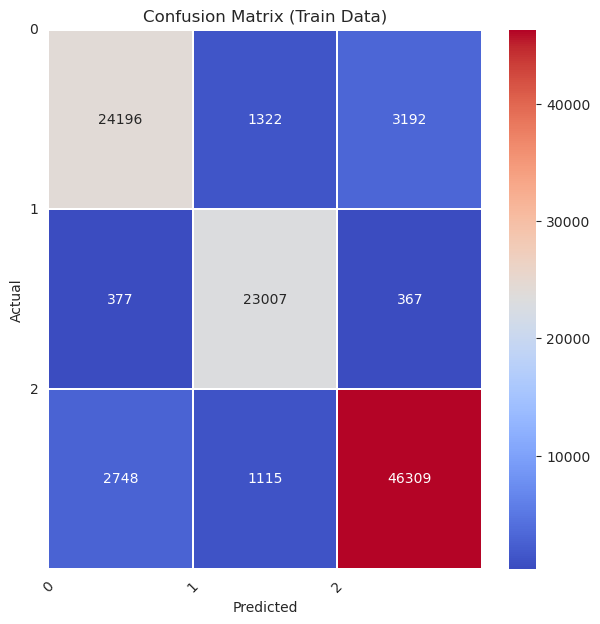


Model Performance (Test Set):
--------------------------------
Test Accuracy:  0.8585584005612066
Test ROC-AUC:  0.9386936037006993
Test F1 Score:  0.857528308832253
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.79      0.75      0.77      9568
           1       0.88      0.94      0.91      7819
           2       0.88      0.88      0.88     16825

    accuracy                           0.86     34212
   macro avg       0.85      0.86      0.86     34212
weighted avg       0.86      0.86      0.86     34212



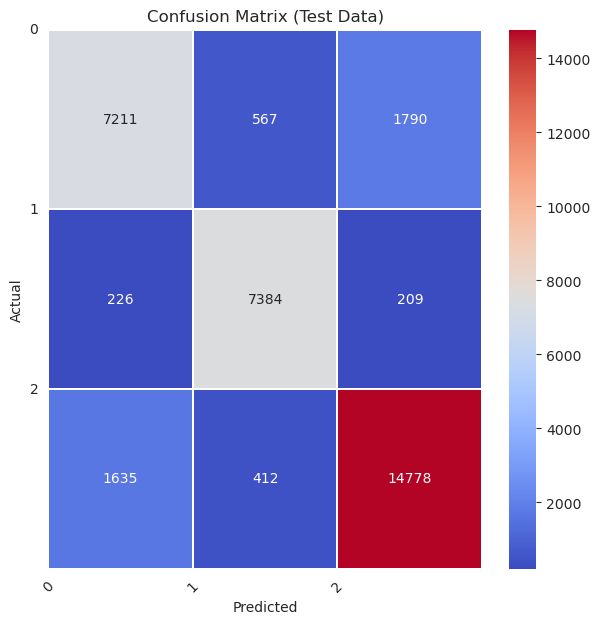

In [110]:
# Predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_preds_classes = np.argmax(train_preds, axis=-1)
test_preds_classes = np.argmax(test_preds, axis=-1)

# Convert categorical y data to integer for evaluation
y_train_int = y_train.argmax(axis=1)
y_test_int = y_test.argmax(axis=1)

def plot_confusion_matrix(conf_mat, classes, title='Confusion Matrix'):
    """
    This function prints and plots the confusion matrix.
    """
    fig, ax = plt.subplots(figsize=(7, 7))
    sns.heatmap(conf_mat, annot=True, fmt='d',
                cmap=plt.cm.coolwarm,
                linewidths=.2)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes, rotation=0)
    plt.show()
    
# Evaluation
print("\nModel Performance (Training Set):")
print("------------------------------------")
train_accuracy = accuracy_score(y_train_int, train_preds_classes)
train_roc_auc = roc_auc_score(y_train, train_preds, multi_class='ovr', average='macro')
train_f1 = f1_score(y_train_int, train_preds_classes, average='weighted')

print("Train Accuracy: ", train_accuracy)
print("Train ROC-AUC: ", train_roc_auc)
print("Train F1 Score: ", train_f1)
print("Classification Report (Train Data):\n", classification_report(y_train_int, train_preds_classes))
train_conf_mat = confusion_matrix(y_train_int, train_preds_classes)
plot_confusion_matrix(train_conf_mat, classes=[0, 1, 2], title='Confusion Matrix (Train Data)')

print("\nModel Performance (Test Set):")
print("--------------------------------")
test_accuracy = accuracy_score(y_test_int, test_preds_classes)
test_roc_auc = roc_auc_score(y_test, test_preds, multi_class='ovr', average='macro')
test_f1 = f1_score(y_test_int, test_preds_classes, average='weighted')

print("Test Accuracy: ", test_accuracy)
print("Test ROC-AUC: ", test_roc_auc)
print("Test F1 Score: ", test_f1)
print("Classification Report (Test Data):\n", classification_report(y_test_int, test_preds_classes))
test_conf_mat = confusion_matrix(y_test_int, test_preds_classes)
plot_confusion_matrix(test_conf_mat, classes=[0, 1, 2], title='Confusion Matrix (Test Data)')


**Observations on LSTM Model Performance**

#### Training Set Evaluation:
- **Accuracy:** The model achieved an accuracy of **91.11%** on the training set, indicating a high proportion of correct predictions during training.
- **ROC-AUC:** A ROC-AUC score of **97.89%** implies that the model has a good capability to distinguish between the sentiment classes during training.
- **F1 Score:** The F1 score of **91.06%** indicates a balanced harmonic mean of precision and recall for the training phase.
- The confusion matrix for the training data provides insights into the model's predictive capabilities for each class, highlighting areas where the model may be misclassifying observations.

#### Test Set Evaluation:
- **Accuracy:** An accuracy of **85.86%** on the test set indicates the proportion of correctly predicted observations during testing.
- **ROC-AUC:** A ROC-AUC of **93.87%** signifies the model's ability to differentiate between the sentiment classes during testing, which is quite commendable.
- **F1 Score:** An F1 score of **85.75%** on the test data provides insights into the balance between precision and recall during testing.
- The confusion matrix for the test data reveals how well the model is performing in predicting each class, pointing out any specific classes where the model might be struggling to make accurate predictions.

Key Takeaway:
- The LSTM model has produced impressive metrics albeit with some very minor overfitting, as denoted by the small gap between the train and test metrics; which we will try to curb through hyperparameter tuning in the subsequent sections. 

Through this evaluation, we gain insights into the model's strengths and weaknesses, guiding potential adjustments and optimizations for improving its predictive capabilities in subsequent iterations.


In [135]:
# Create a DataFrame to store the metrics for the LSTM model
lstm_metrics = pd.DataFrame({
    'Model': ['LSTM'],
    'Train_Accuracy': [train_accuracy],
    'Train_F1': [train_f1],
    'Train_ROC_AUC': [train_roc_auc],
    'Test_Accuracy': [test_accuracy],
    'Test_F1': [test_f1],
    'Test_ROC_AUC': [test_roc_auc]
})

# Concatenate the new metrics to the existing all_metrics DataFrame
all_metrics = pd.concat([all_metrics, lstm_metrics], ignore_index=True)

lstm_metrics

,Model,Train_Accuracy,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_F1,Test_ROC_AUC
0,LSTM,0.91113,0.910631,0.978966,0.858558,0.857528,0.938694


### 5. Transfer Learning with Transformers

In this section, we transition into utilizing **Transfer Learning** for our sentiment analysis task, employing the **DistilBERT** pre-trained model from Hugging Face's Transformers Library.

**Why DistilBERT?**
- **Pre-Trained Model:** DistilBERT comes pre-trained on a vast corpus of text, enabling it to understand language structures and context effectively.
- **Computational Efficiency:** DistilBERT, being a lighter version of BERT, allows us to leverage the power of BERT’s language understanding with reduced computational requirements.
- **Fine-Tuning Capability:** We can fine-tune DistilBERT on our specific task (sentiment analysis), allowing it to adapt its pre-trained knowledge to our domain.

**Approach:**
1. **Data Preparation:** Adapt our text data to be compatible with DistilBERT.
2. **Model Fine-Tuning:** Fine-tune DistilBERT on our sentiment analysis task.
3. **Model Assessment:** Assess the performance of the fine-tuned model on our dataset.


In [113]:
# Set random seeds for reproducibility
def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

# Use the function to set the seed
set_seed(42)


**Data Preparation for DistilBERT**

Before feeding our data into DistilBERT, we need to ensure that it adheres to the expected format and is split appropriately into training and testing sets:
- **Label Column Renaming:** Rename the column containing our label data to be recognized by the model.
- **Data Splitting:** Separate our data into training and testing sets to facilitate model training and subsequent evaluation.


In [114]:
# Rename the 'encoded_sentiment' column to 'labels'
new_df = new_df.rename(columns={"encoded_sentiment": "labels"})

# Split the DataFrame into train and test sets with stratification
train_df, test_df = train_test_split(new_df, test_size=0.2, random_state=42)#, 
                                     #stratify=new_df["labels"])


**Tokenization Using DistilBERT Tokenizer**

The tokenizer converts text into tokens (numeric representations), which is the input format expected by the model.


In [115]:
# Initialize a BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples["cleaned_body"], padding="max_length", truncation=True, max_length=512)

# Tokenize the data and include labels
tokenized_train_dataset = Dataset.from_pandas(train_df).map(tokenize_function, batched=True)
tokenized_test_dataset = Dataset.from_pandas(test_df).map(tokenize_function, batched=True)


Map:   0%|          | 0/109476 [00:00<?, ? examples/s]

Map:   0%|          | 0/27369 [00:00<?, ? examples/s]

- The tokenization function ensures **padding** and **truncation** to handle texts of varying lengths, with a maximum length set to `512` tokens. Any text longer than this is truncated, while shorter texts are padded to maintain a consistent input size.
- Tokenized versions of the training and testing datasets have been created (`tokenized_train_dataset` and `tokenized_test_dataset`), which will be utilized to fine-tune the model in the subsequent sections.

With our data tokenized and prepared, we will proceed to configure and fine-tune the DistilBERT model, adapting its pre-trained capabilities to our specific sentiment analysis task.


In [116]:
# Checking if CUDA (GPU) is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

Below we address the potential issue of class imbalance and initialize DistilBERT for sequence classification:
- **Class Weights Calculation:** Compute weights for each class to address imbalance during training.
- **Training Argument Definition:** Set up training arguments to guide the fine-tuning process.
- **Model Initialization:** Load and configure DistilBERT for our specific classification task.


In [117]:
# Compute class weights to address class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(train_df["labels"]), y=train_df["labels"])
class_weights = torch.tensor(class_weights).to(device)  # Convert to torch tensor and send to device

# Define training arguments
training_args = TrainingArguments(
    output_dir="./DistilBert_results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_total_limit=2,
)

# Load the model for sequence classification
num_labels = len(train_df["labels"].unique())
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=num_labels)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Model Configuration and Initialization Insights**

- **Class Weights:** Weights have been calculated for each class to address potential class imbalances, ensuring that the model does not exhibit a bias towards the majority class during training.
- **Training Arguments:** Various training arguments have been defined to guide the fine-tuning of DistilBERT, such as batch size, number of epochs, and evaluation strategy.
- **Model Initialization:** DistilBERT has been initialized for sequence classification with `3` labels, ensuring it is tailored for our specific task.


**Defining a Custom Metric Computation Function**

To thoroughly evaluate our fine-tuned DistilBERT model, we will define a custom function, `compute_metrics`, that computes various crucial metrics given the model's predictions and actual labels.


In [118]:
# Define the compute_metrics function
from scipy.special import softmax

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probabilities = softmax(logits, axis=-1)  # Convert logits to probabilities
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    roc_auc = roc_auc_score(labels, probabilities, multi_class='ovr', average='weighted')
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall, "roc_auc": roc_auc}

Insights on the `compute_metrics` Function:

- **Input:** Takes `eval_pred`, which contains the model’s logits and actual labels.
- **Processing:**
  - Logits are converted to probabilities using the softmax function to enable probability-based evaluations (such as ROC-AUC).
  - Predictions are derived by selecting the class with the highest logit/probability.
- **Output:** Returns a dictionary containing computed metrics, which will provide detailed insights into the model's performance during evaluation.


**Custom Data Collation and Trainer Initialization**

In this step, we will:
- **Define a Custom Data Collator:** Create a function, `custom_data_collator`, that prepares batches of our tokenized texts for input into the model by stacking tensors.
- **Initialize the Trainer:** Set up a `Trainer` object that will guide the training, evaluation, and fine-tuning of DistilBERT, using our custom configurations and data collator.


In [119]:
def custom_data_collator(batch):
    input_ids = torch.stack([torch.tensor(item['input_ids']) for item in batch])
    attention_mask = torch.stack([torch.tensor(item['attention_mask']) for item in batch])
    labels = torch.tensor([item['labels'] for item in batch])
    return {'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': labels}

# Create a Trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_test_dataset,
    compute_metrics=compute_metrics,
    data_collator=custom_data_collator,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

Insights on Data Collation and Trainer Initialization:

- **Custom Data Collator:**
  - This function takes a batch of tokenized texts and stacks their `input_ids`, `attention_mask`, and `labels` into tensors, ensuring they are in a suitable format for model input.
  - Ensures consistent and appropriate data format during model training and evaluation.

- **Trainer Initialization:**
  - `model`: The DistilBERT model initialized for our classification task.
  - `args`: Training arguments that guide the training process, defined previously.
  - `train_dataset` and `eval_dataset`: The tokenized training and testing data, respectively.
  - `compute_metrics`: The function we defined to compute various evaluation metrics.
  - `data_collator`: Our custom data collator function, ensuring our batches are processed and input into the model correctly.
  - `callbacks`: Utilize an early stopping callback to halt training if validation score does not improve after a specified number of epochs, ensuring efficient training.


In [120]:
# Fine-tune the model
train_result = trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Roc Auc
1,0.384800,0.397561,0.871789,0.871917,0.872311,0.871789,0.949245
2,0.353400,0.415737,0.880960,0.880307,0.880010,0.880960,0.952987


In [121]:
# Evaluate the model on the test set
eval_results = trainer.evaluate()

# Display Metrics
print(f"\nEvaluation Results: {eval_results}\n")


Evaluation Results: {'eval_loss': 0.41573652625083923, 'eval_accuracy': 0.8809602104570865, 'eval_f1': 0.8803070067962028, 'eval_precision': 0.8800095943210723, 'eval_recall': 0.8809602104570865, 'eval_roc_auc': 0.9529870001882277, 'eval_runtime': 448.9294, 'eval_samples_per_second': 60.965, 'eval_steps_per_second': 7.623, 'epoch': 2.0}



In [122]:
# Predictions
train_preds = trainer.predict(tokenized_train_dataset)
test_preds = trainer.predict(tokenized_test_dataset)

# Convert logits to labels
train_preds_classes = np.argmax(train_preds.predictions, axis=-1)
test_preds_classes = np.argmax(test_preds.predictions, axis=-1)

# True labels
y_train_classes = np.array(tokenized_train_dataset['labels'])
y_val_classes = np.array(tokenized_test_dataset['labels'])

# Metrics
accuracy_train = accuracy_score(y_train_classes, train_preds_classes)
f1_train = f1_score(y_train_classes, train_preds_classes, average='weighted')
roc_auc_train = roc_auc_score(y_train_classes, softmax(train_preds.predictions, axis=-1), multi_class='ovr', 
                              average='weighted')

accuracy_val = accuracy_score(y_val_classes, test_preds_classes)
f1_val = f1_score(y_val_classes, test_preds_classes, average='weighted')
roc_auc_val = roc_auc_score(y_val_classes, softmax(test_preds.predictions, axis=-1), multi_class='ovr', 
                            average='weighted')

# Retrieve training & validation loss
training_loss = train_result.training_loss
validation_loss = eval_results["eval_loss"]


In [123]:
# Create a DataFrame for BERT metrics
DistilBert_metrics = pd.DataFrame({
    'Model': ['DistilBERT'],
    'Train_Accuracy': [accuracy_train],
    'Train_F1': [f1_train],
    'Train_ROC_AUC': [roc_auc_train],
    'Test_Accuracy': [accuracy_val],
    'Test_F1': [f1_val],
    'Test_ROC_AUC': [roc_auc_val],
    'Train Loss': [training_loss],
    'Test Loss': [validation_loss]
})

DistilBert_metrics

,Model,Train_Accuracy,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_F1,Test_ROC_AUC,Train Loss,Test Loss
0,DistilBERT,0.922038,0.921663,0.972574,0.88096,0.880307,0.952987,0.404772,0.415737


In [124]:
# Display additional metrics
print("DistilBERT Metrics")
print("-------------------")
print(f"Train Accuracy: {accuracy_train}, Validation Accuracy: {accuracy_val}")
print(f"Train F1 Score: {f1_train}, Validation F1 Score: {f1_val}")
print(f"Train ROC-AUC Score: {roc_auc_train}, Validation ROC-AUC Score: {roc_auc_val}")
print(f"Train Loss: {training_loss}, Validation Loss: {validation_loss}")

# Display Classification Report
print("\nClassification Report (Train Data):\n", classification_report(y_train_classes, train_preds_classes))
print("\nClassification Report (Validation Data):\n", classification_report(y_val_classes, test_preds_classes))


DistilBERT Metrics
-------------------
Train Accuracy: 0.9220377068946618, Validation Accuracy: 0.8809602104570865
Train F1 Score: 0.9216634540996035, Validation F1 Score: 0.8803070067962028
Train ROC-AUC Score: 0.9725738640859002, Validation ROC-AUC Score: 0.9529870001882277
Train Loss: 0.4047716586050606, Validation Loss: 0.41573652625083923

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.90      0.86      0.88     30633
           1       0.93      0.96      0.95     25366
           2       0.93      0.94      0.93     53477

    accuracy                           0.92    109476
   macro avg       0.92      0.92      0.92    109476
weighted avg       0.92      0.92      0.92    109476


Classification Report (Validation Data):
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      7645
           1       0.92      0.94      0.93      6204
           2       0.89      

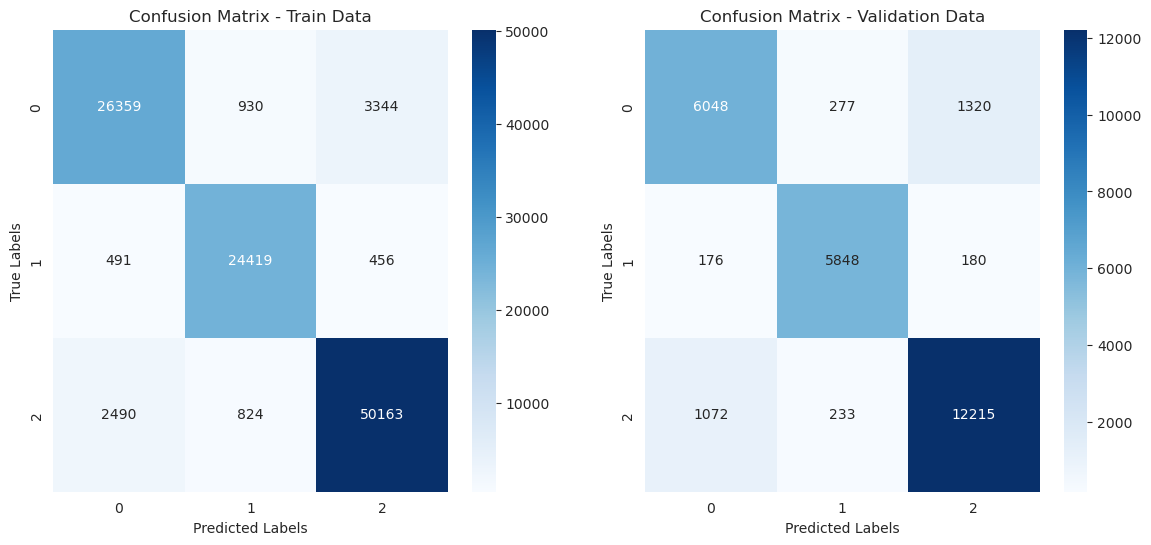

In [125]:
# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train_classes, train_preds_classes)
conf_matrix_val = confusion_matrix(y_val_classes, test_preds_classes)

# Visualize Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(conf_matrix_train, annot=True, fmt='g', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Train Data')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_val, annot=True, fmt='g', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Validation Data')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.show()

- Concatenate the `all_metrics` DataFrame to enable easy comparison of all the models.

In [131]:
# Concatenate the DataFrames
all_metrics = pd.concat([all_metrics, DistilBert_metrics], ignore_index=True)

# Make a copy of the all_metrics df
all_metrics_copy = all_metrics.copy()

In [134]:
# Manually mapping the model names
model_names_mapping = {0: "MultinomialNB-tfidf", 
                       1: "RandomForestClassifier-tfidf", 
                       2: "RandomForestClassifier-word2vec",
                       3: "RandomForestClassifier-doc2vec",
                       4: "XGBClassifier-tfidf",
                       5: "XGBClassifier-word2vec",
                       6: "XGBClassifier-doc2vec",
                       7: "LSTM",
                       8: "DistilBERT"}

# Function to make the all_metrics df neat
def neat(model, idx):
    # If idx is in model_names_mapping, return the corresponding name
    if idx in model_names_mapping:
        return model_names_mapping[idx]
    # If XGBClassifier, return a neat name
    elif "XGBClassifier" in str(model):
        return "XGBClassifier"
    # For other models, return the class name
    else:
        return model.__class__.__name__

# Apply the function to the 'Model' column
all_metrics['Model'] = all_metrics.apply(lambda row: neat(row['Model'], row.name), axis=1)

# Round the metrics to a fixed number of decimal places
metrics_columns = ['Train_Accuracy', 'Train_F1', 'Train_ROC_AUC', 'Test_Accuracy', 'Test_F1', 'Test_ROC_AUC', 
                   'Training_Time', 'Train Loss', 'Test Loss']
all_metrics[metrics_columns] = all_metrics[metrics_columns].round(3)

all_metrics = all_metrics.drop(9, axis=0).reset_index(drop=True)

# Display all metrics
print("\nAll Metrics:")
print("---------------")
all_metrics



All Metrics:
---------------


,Model,Train_Accuracy,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_F1,Test_ROC_AUC,Training_Time,Train Loss,Test Loss
0,MultinomialNB-tfidf,0.733,0.734,0.854,0.697,0.699,0.814,165.440,NaN,NaN
1,RandomForestClassifier-tfidf,0.995,0.995,0.999,0.812,0.810,0.912,470.589,NaN,NaN
2,RandomForestClassifier-word2vec,0.998,0.998,0.999,0.625,0.623,0.788,151.987,NaN,NaN
3,RandomForestClassifier-doc2vec,1.000,1.000,1.000,0.579,0.572,0.736,160.744,NaN,NaN
4,XGBClassifier-tfidf,0.779,0.779,0.915,0.749,0.747,0.890,282.696,NaN,NaN
5,XGBClassifier-word2vec,0.749,0.750,0.902,0.638,0.641,0.813,25.635,NaN,NaN
6,XGBClassifier-doc2vec,0.735,0.737,0.883,0.603,0.605,0.773,25.887,NaN,NaN
7,LSTM,0.911,0.911,0.979,0.859,0.858,0.939,NaN,NaN,NaN
8,DistilBERT,0.922,0.922,0.973,0.881,0.880,0.953,NaN,0.405,0.416


## Hyperparameter Tuning

### i.) Random Forest with TF-IDF Features (Randomized Search)

In [145]:
# Define the model
rf_model = RandomForestClassifier(random_state=200, n_jobs=-1)

# Define the parameter grid
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Initialize Randomized Search model
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions, 
                                   n_iter=25, scoring='accuracy', cv=3, verbose=2, 
                                   random_state=42, n_jobs=-1)

# Label encoding the target variable
le = LabelEncoder()
new_df['encoded_sentiment'] = le.fit_transform(new_df['sentiment_category'])

# Splitting the data
X = tfidf_vectors  # Features (TF-IDF values)
y = new_df['encoded_sentiment']  # Target variable

# Fit the Randomized Search to the data
random_search_rf.fit(X, y)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=200),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy', verbose=2)

In [146]:
# Get the best parameters
best_params_rf = random_search_rf.best_params_
print(f"Best parameters: {best_params_rf}")


Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 15, 'criterion': 'gini', 'bootstrap': False}


- **Train and evaluate Random Forest Model with the best parameters**

In [147]:
# Train and evaluate the best model
best_model_rf = RandomForestClassifier(**best_params_rf, random_state=200, n_jobs=-1)
trained_best_model_rf, best_model_metrics_rf = train_and_evaluate(best_model_rf, X, y)


Training time: 169.22494077682495 seconds


Model Performance
------------------
Train Accuracy:  0.6685574920530527
Train F1 Score:  0.6727682002815563
Train ROC-AUC Score:  0.8541221491461494

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.76      0.50      0.60     30633
           1       0.48      0.98      0.64     25366
           2       0.88      0.62      0.73     53477

    accuracy                           0.67    109476
   macro avg       0.71      0.70      0.66    109476
weighted avg       0.75      0.67      0.67    109476


Test Accuracy:  0.6387518725565421
Test F1 Score:  0.6385677946091348
Test ROC-AUC Score:  0.8284640798551196

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.68      0.45      0.54      7645
           1       0.47      0.97      0.64      6204
           2       0.84      0.59      0.70     13520

    accuracy         

In [148]:
best_model_metrics_rf

,Model,Train_Accuracy,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_F1,Test_ROC_AUC,Training_Time
0,"RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_split=5,\n n_jobs=-1, random_state=200)",0.668557,0.672768,0.854122,0.638752,0.638568,0.828464,169.224941


### ii.) Tuning LSTM with KerasTuner

In [149]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras_tuner import RandomSearch
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from tensorflow.keras import backend as K

In [150]:
# Set random seed
np.random.seed(42)
tf.random.set_seed(42)

# Your provided data preprocessing code
tokenizer = Tokenizer(num_words=5000)  
tokenizer.fit_on_texts(new_df['cleaned_body'])
sequences = tokenizer.texts_to_sequences(new_df['cleaned_body'])

# Pad sequences
X_lstm = pad_sequences(sequences, maxlen=100)  
y_lstm = to_categorical(new_df['encoded_sentiment'])

# Ensure the shapes match
assert X_lstm.shape[0] == y_lstm.shape[0]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.25, random_state=42)


In [151]:
# Define a model-building function
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=5000, 
                        output_dim=hp.Int('embedding_output_dim', min_value=32, max_value=128, step=32), 
                        input_length=100))
    model.add(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=256, step=32), 
                   dropout=hp.Float('lstm_dropout', min_value=0.0, max_value=0.5, step=0.1, default=0.2), 
                   recurrent_dropout=hp.Float('lstm_recurrent_dropout', min_value=0.0, max_value=0.5,step=0.1,default=0.2)))
    model.add(Dense(3, activation='softmax')) 

    # Compiling the model
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [152]:
# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,  # number of different random configurations to try
    executions_per_trial=2,  # number of models to train per trial
    directory='lstm_random_search_tuning',
    project_name='lstm_tuning'
)

# Define early stopping to stop training if val_loss does not decrease
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Start the search for the best parameters
tuner.search(X_train, y_train, epochs=3, validation_data=(X_test, y_test), callbacks=[early_stopping])


Trial 3 Complete [00h 24m 19s]
val_accuracy: 0.8517187237739563

Best val_accuracy So Far: 0.8560592532157898
Total elapsed time: 01h 45m 58s


In [153]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the LSTM layer is {best_hps.get('lstm_units')},
the optimal dropout rate is {best_hps.get('lstm_dropout')},
the optimal recurrent dropout rate is {best_hps.get('lstm_recurrent_dropout')},
the optimal embedding output dimension is {best_hps.get('embedding_output_dim')},
and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")



The hyperparameter search is complete. The optimal number of units in the LSTM layer is 192,
the optimal dropout rate is 0.1,
the optimal recurrent dropout rate is 0.4,
the optimal embedding output dimension is 96,
and the optimal learning rate for the optimizer is 0.0001.



- **Train and evaluate LSTM Model with the best parameters**

In [154]:
# Set random seed for numpy
np.random.seed(42)

# Set random seed for TensorFlow
tf.random.set_seed(42)


In [155]:
# Tokenize the text
tokenizer = Tokenizer(num_words=5000) 
tokenizer.fit_on_texts(new_df['cleaned_body'])
sequences = tokenizer.texts_to_sequences(new_df['cleaned_body'])

# Pad sequences
X_lstm = pad_sequences(sequences, maxlen=100)
y_lstm = to_categorical(new_df['encoded_sentiment'])

# Ensure the shapes match
print(X_lstm.shape[0] == y_lstm.shape[0])


True


In [156]:
# Optimal hyperparameters
optimal_lstm_units = 192
optimal_dropout_rate = 0.1
optimal_recurrent_dropout_rate = 0.4
optimal_embedding_output_dim = 96
optimal_learning_rate = 0.0001

# Build the model with the optimal hyperparameters
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=optimal_embedding_output_dim, input_length=100))
model.add(LSTM(optimal_lstm_units, dropout=optimal_dropout_rate, recurrent_dropout=optimal_recurrent_dropout_rate))
model.add(Dense(3, activation='softmax'))  # Because we have 3 sentiment categories

# Compile the model with the optimal learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=optimal_learning_rate), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [157]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.25, random_state=42)

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
3208/3208 [==============================] - 621s 193ms/step - loss: 0.7127 - accuracy: 0.6846 - val_loss: 0.4971 - val_accuracy: 0.8101
Epoch 2/5
3208/3208 [==============================] - 626s 195ms/step - loss: 0.4374 - accuracy: 0.8448 - val_loss: 0.4328 - val_accuracy: 0.8489
Epoch 3/5
3208/3208 [==============================] - 653s 204ms/step - loss: 0.3943 - accuracy: 0.8641 - val_loss: 0.4189 - val_accuracy: 0.8562
Epoch 4/5
3208/3208 [==============================] - 647s 202ms/step - loss: 0.3774 - accuracy: 0.8709 - val_loss: 0.4170 - val_accuracy: 0.8559
Epoch 5/5
3208/3208 [==============================] - 645s 201ms/step - loss: 0.3699 - accuracy: 0.8739 - val_loss: 0.4148 - val_accuracy: 0.8569


1070/1070 [==============================] - 29s 27ms/step

Model Performance (Training Set):
------------------------------------
Train Accuracy:  0.8825621388832052
Train ROC-AUC:  0.9576698488485956
Train F1 Score:  0.8815387678392781
Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.84      0.79      0.81     28710
           1       0.89      0.96      0.93     23751
           2       0.90      0.90      0.90     50172

    accuracy                           0.88    102633
   macro avg       0.88      0.88      0.88    102633
weighted avg       0.88      0.88      0.88    102633



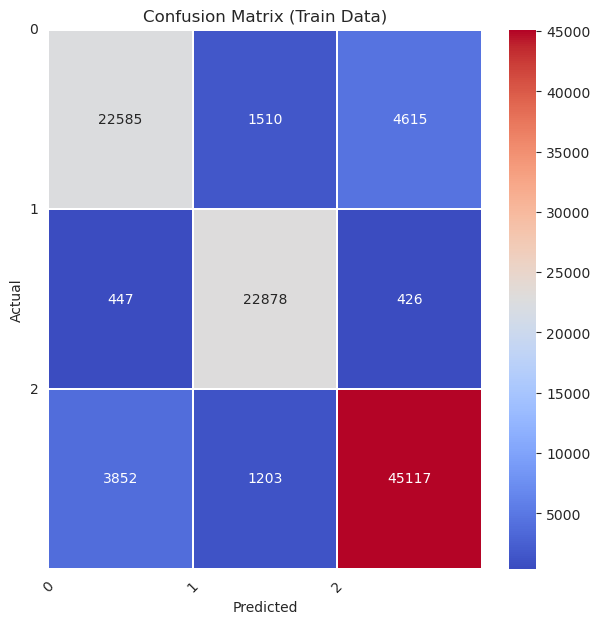


Model Performance (Test Set):
--------------------------------
Test Accuracy:  0.8569215479948556
Test ROC-AUC:  0.9395411524312203
Test F1 Score:  0.855674728065592
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.80      0.75      0.77      9568
           1       0.88      0.95      0.91      7819
           2       0.88      0.88      0.88     16825

    accuracy                           0.86     34212
   macro avg       0.85      0.86      0.85     34212
weighted avg       0.86      0.86      0.86     34212



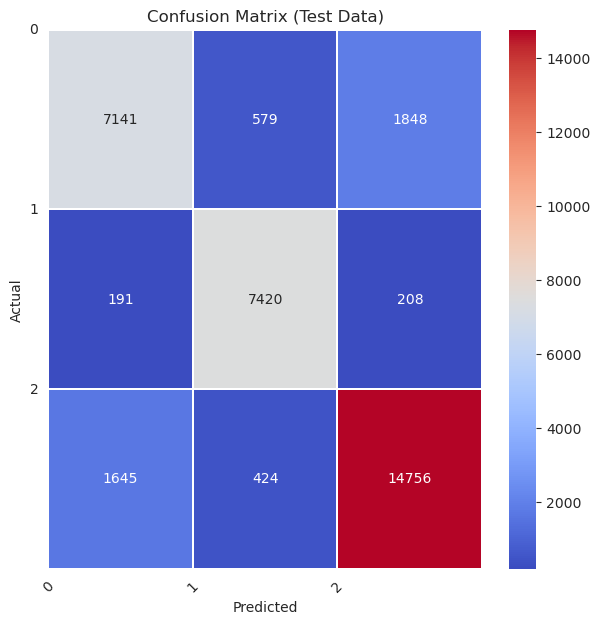

In [158]:
# Predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_preds_classes = np.argmax(train_preds, axis=-1)
test_preds_classes = np.argmax(test_preds, axis=-1)

# Convert categorical y data to integer for evaluation
y_train_int = y_train.argmax(axis=1)
y_test_int = y_test.argmax(axis=1)

def plot_confusion_matrix(conf_mat, classes, title='Confusion Matrix'):
    """
    This function prints and plots the confusion matrix.
    """
    fig, ax = plt.subplots(figsize=(7, 7))
    sns.heatmap(conf_mat, annot=True, fmt='d',
                cmap=plt.cm.coolwarm,
                linewidths=.2)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes, rotation=0)
    plt.show()
    
# Evaluation
print("\nModel Performance (Training Set):")
print("------------------------------------")
train_accuracy = accuracy_score(y_train_int, train_preds_classes)
train_roc_auc = roc_auc_score(y_train, train_preds, multi_class='ovr', average='macro')
train_f1 = f1_score(y_train_int, train_preds_classes, average='weighted')

print("Train Accuracy: ", train_accuracy)
print("Train ROC-AUC: ", train_roc_auc)
print("Train F1 Score: ", train_f1)
print("Classification Report (Train Data):\n", classification_report(y_train_int, train_preds_classes))
train_conf_mat = confusion_matrix(y_train_int, train_preds_classes)
plot_confusion_matrix(train_conf_mat, classes=[0, 1, 2], title='Confusion Matrix (Train Data)')

print("\nModel Performance (Test Set):")
print("--------------------------------")
test_accuracy = accuracy_score(y_test_int, test_preds_classes)
test_roc_auc = roc_auc_score(y_test, test_preds, multi_class='ovr', average='macro')
test_f1 = f1_score(y_test_int, test_preds_classes, average='weighted')

print("Test Accuracy: ", test_accuracy)
print("Test ROC-AUC: ", test_roc_auc)
print("Test F1 Score: ", test_f1)
print("Classification Report (Test Data):\n", classification_report(y_test_int, test_preds_classes))
test_conf_mat = confusion_matrix(y_test_int, test_preds_classes)
plot_confusion_matrix(test_conf_mat, classes=[0, 1, 2], title='Confusion Matrix (Test Data)')


In [159]:
# Create a DataFrame to store the metrics for the LSTM model
best_lstm_metrics = pd.DataFrame({
    'Model': ['LSTM'],
    'Train_Accuracy': [train_accuracy],
    'Train_F1': [train_f1],
    'Train_ROC_AUC': [train_roc_auc],
    'Test_Accuracy': [test_accuracy],
    'Test_F1': [test_f1],
    'Test_ROC_AUC': [test_roc_auc]
})
best_lstm_metrics

,Model,Train_Accuracy,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_F1,Test_ROC_AUC
0,LSTM,0.882562,0.881539,0.95767,0.856922,0.855675,0.939541


### iii.) Tuning DistilBERT with Optuna

In [160]:
import optuna
import torch
from transformers import TrainingArguments, Trainer, DistilBertTokenizerFast, DistilBertForSequenceClassification
from datasets import load_dataset, load_metric
logging.getLogger("tensorflow").setLevel(logging.ERROR)
logging.getLogger("huggingface").setLevel(logging.WARNING)
logging.getLogger("transformers").setLevel(logging.WARNING)

In [162]:
# Label encoding the target variable
# le = LabelEncoder()
# new_df['encoded_sentiment'] = le.fit_transform(new_df['sentiment_category'])

#Loading and Preprocessing the data
# sample_size = 1000
# sampled_df = new_df.sample(sample_size, random_state=42)
# new_df = new_df.rename(columns={"encoded_sentiment": "labels"})
train_df, test_df = train_test_split(new_df, test_size=0.2, random_state=42)#, stratify=sampled_df["labels"])
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

In [163]:
# Tokenize
def tokenize_function(examples):
    return tokenizer(examples["cleaned_body"], padding="max_length", truncation=True, max_length=512)

# Tokenizing data
tokenized_train_dataset = Dataset.from_pandas(train_df).map(tokenize_function, batched=True)
tokenized_test_dataset = Dataset.from_pandas(test_df).map(tokenize_function, batched=True)

# Model initialization
def model_init():
    return DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

Map:   0%|          | 0/109476 [00:00<?, ? examples/s]

Map:   0%|          | 0/27369 [00:00<?, ? examples/s]

In [164]:
# Compute metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    roc_auc = roc_auc_score(labels, softmax(logits, axis=-1), multi_class='ovr', average='weighted')
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall, "roc_auc": roc_auc}

In [167]:
# Set the search space
def objective(trial):
    # Hyperparameters to be tuned
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-3, log=True)
    num_train_epochs = trial.suggest_int("num_train_epochs", 2, 3, 4)
    per_device_train_batch_size = trial.suggest_categorical("per_device_train_batch_size", [4, 8])
    per_device_eval_batch_size = trial.suggest_categorical("per_device_eval_batch_size", [4, 8])
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-1, log=True)

    # TrainingArguments and Trainer
    training_args = TrainingArguments(
        output_dir='./DistilBert_results_tuning',
        learning_rate=learning_rate,
        num_train_epochs=num_train_epochs,
        per_device_train_batch_size=per_device_train_batch_size,
        per_device_eval_batch_size=per_device_eval_batch_size,
        weight_decay=weight_decay,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        logging_dir="./DistilBert_tuning_logs",
        logging_steps=200,
        do_train=True,
        do_eval=True,
        no_cuda=False,
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
        greater_is_better=True,
    )

    trainer = Trainer(
        args=training_args,
        train_dataset=tokenized_train_dataset,
        eval_dataset=tokenized_test_dataset,
        model_init=model_init,
        compute_metrics=compute_metrics,
    )
    
    # Training and evaluation
    trainer.train()
    
    # Evaluation
    metrics = trainer.evaluate()
    
    # Debugging: Print the metrics to ensure they are computed.
    print(metrics)

    # Save additional metrics
    trial.set_user_attr("f1", metrics["eval_f1"])
    trial.set_user_attr("roc_auc", metrics["eval_roc_auc"])

    # Return the objective value: accuracy
    return metrics["eval_accuracy"]



In [170]:
# Create a study object and specify the direction is 'maximize'.
study = optuna.create_study(direction='maximize')

# Optimize the study, the objective function is passed in as the first argument.
study.optimize(objective, n_trials=2)


[I 2023-10-13 07:44:39,068] A new study created in memory with name: no-name-6d83b37d-078c-44de-8dd8-b80c55a5add5
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Roc Auc
1,0.437500,0.401447,0.871022,0.871914,0.874031,0.871022,0.950587
2,0.376000,0.404156,0.882641,0.882116,0.881832,0.882641,0.954577


[I 2023-10-13 11:00:41,179] Trial 0 finished with value: 0.8826409441338741 and parameters: {'learning_rate': 3.0007300926037184e-05, 'num_train_epochs': 2, 'per_device_train_batch_size': 8, 'per_device_eval_batch_size': 8, 'weight_decay': 6.559338660290935e-05}. Best is trial 0 with value: 0.8826409441338741.


{'eval_loss': 0.40415582060813904, 'eval_accuracy': 0.8826409441338741, 'eval_f1': 0.8821155244909581, 'eval_precision': 0.8818319875506436, 'eval_recall': 0.8826409441338741, 'eval_roc_auc': 0.9545771662143615, 'eval_runtime': 457.9261, 'eval_samples_per_second': 59.767, 'eval_steps_per_second': 7.473, 'epoch': 2.0}


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Roc Auc
1,0.525400,0.531728,0.870693,0.870909,0.871213,0.870693,0.946922
2,0.469200,0.509689,0.880120,0.879672,0.879400,0.880120,0.952280


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[I 2023-10-13 14:29:42,231] Trial 1 finished with value: 0.8801198436186927 and parameters: {'learning_rate': 3.628573857380362e-05, 'num_train_epochs': 2, 'per_device_train_batch_size': 4, 'per_device_eval_batch_size': 4, 'weight_decay': 0.0012516137495085238}. Best is trial 0 with value: 0.8826409441338741.


{'eval_loss': 0.5096891522407532, 'eval_accuracy': 0.8801198436186927, 'eval_f1': 0.8796723848155306, 'eval_precision': 0.8794002496210109, 'eval_recall': 0.8801198436186927, 'eval_roc_auc': 0.9522804488259483, 'eval_runtime': 457.3116, 'eval_samples_per_second': 59.848, 'eval_steps_per_second': 14.964, 'epoch': 2.0}


In [171]:
# Results
trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print('F1: {}'.format(trial.user_attrs["f1"]))
print('ROC-AUC: {}'.format(trial.user_attrs["roc_auc"]))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.8826409441338741
F1: 0.8821155244909581
ROC-AUC: 0.9545771662143615
Best hyperparameters: {'learning_rate': 3.0007300926037184e-05, 'num_train_epochs': 2, 'per_device_train_batch_size': 8, 'per_device_eval_batch_size': 8, 'weight_decay': 6.559338660290935e-05}


- **Train and evaluate DistilBERT Model with the best parameters**

In [172]:
# Set random seeds for reproducibility
def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

# Use the function to set the seed
set_seed(42)


In [173]:
# Rename the 'encoded_sentiment' column to 'labels'
# new_df = new_df.rename(columns={"encoded_sentiment": "labels"})

# Split the DataFrame into train and test sets with stratification
train_df, test_df = train_test_split(new_df, test_size=0.2, random_state=42)#, 
                                     #stratify=new_df["labels"])


In [174]:
# Initialize a BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples["cleaned_body"], padding="max_length", truncation=True, max_length=512)

# Tokenize the data and include labels
tokenized_train_dataset = Dataset.from_pandas(train_df).map(tokenize_function, batched=True)
tokenized_test_dataset = Dataset.from_pandas(test_df).map(tokenize_function, batched=True)


Map:   0%|          | 0/109476 [00:00<?, ? examples/s]

Map:   0%|          | 0/27369 [00:00<?, ? examples/s]

In [175]:
# Checking if CUDA (GPU) is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [176]:
# Compute class weights to address class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(train_df["labels"]), y=train_df["labels"])
class_weights = torch.tensor(class_weights).to(device)  # Convert to torch tensor and send to device


# Best hyperparameters
best_params = {
    'learning_rate': 3.0007300926037184e-05, 
    'num_train_epochs': 2, 
    'per_device_train_batch_size': 8, 
    'per_device_eval_batch_size': 8, 
    'weight_decay': 6.559338660290935e-05
}


# Define training arguments with best parameters
training_args = TrainingArguments(
    output_dir="./Final_DistilBert_Results",
    evaluation_strategy="epoch",
    save_strategy="epoch",  
    per_device_train_batch_size=best_params['per_device_train_batch_size'],
    per_device_eval_batch_size=best_params['per_device_eval_batch_size'],
    num_train_epochs=best_params['num_train_epochs'],
    learning_rate=best_params['learning_rate'],
    weight_decay=best_params['weight_decay'],
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_total_limit=2,
)

In [177]:
# Load the model for sequence classification
num_labels = len(train_df["labels"].unique())
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=num_labels)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [178]:
# Define the compute_metrics function
from scipy.special import softmax

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probabilities = softmax(logits, axis=-1)  # Convert logits to probabilities
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    roc_auc = roc_auc_score(labels, probabilities, multi_class='ovr', average='weighted')
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall, "roc_auc": roc_auc}

In [179]:
def custom_data_collator(batch):
    input_ids = torch.stack([torch.tensor(item['input_ids']) for item in batch])
    attention_mask = torch.stack([torch.tensor(item['attention_mask']) for item in batch])
    labels = torch.tensor([item['labels'] for item in batch])
    return {'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': labels}

# Create a Trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_test_dataset,
    compute_metrics=compute_metrics,
    data_collator=custom_data_collator,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

In [180]:
# Fine-tune the model
train_result = trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Roc Auc
1,0.381700,0.414039,0.874457,0.874338,0.874253,0.874457,0.949082
2,0.359800,0.417266,0.881143,0.880661,0.880376,0.881143,0.953074


In [181]:
# Evaluate the model on the test set
eval_results = trainer.evaluate()

# Display Metrics
print(f"\nEvaluation Results: {eval_results}\n")


Evaluation Results: {'eval_loss': 0.4172656238079071, 'eval_accuracy': 0.8811428989002156, 'eval_f1': 0.8806610676960608, 'eval_precision': 0.8803762824352497, 'eval_recall': 0.8811428989002156, 'eval_roc_auc': 0.9530736902806765, 'eval_runtime': 452.1811, 'eval_samples_per_second': 60.527, 'eval_steps_per_second': 7.568, 'epoch': 2.0}



In [182]:
# Predictions
train_preds = trainer.predict(tokenized_train_dataset)
test_preds = trainer.predict(tokenized_test_dataset)

# Convert logits to labels
train_preds_classes = np.argmax(train_preds.predictions, axis=-1)
test_preds_classes = np.argmax(test_preds.predictions, axis=-1)

# True labels
y_train_classes = np.array(tokenized_train_dataset['labels'])
y_val_classes = np.array(tokenized_test_dataset['labels'])

# Metrics
accuracy_train = accuracy_score(y_train_classes, train_preds_classes)
f1_train = f1_score(y_train_classes, train_preds_classes, average='weighted')
roc_auc_train = roc_auc_score(y_train_classes, softmax(train_preds.predictions, axis=-1), multi_class='ovr', 
                              average='weighted')

accuracy_val = accuracy_score(y_val_classes, test_preds_classes)
f1_val = f1_score(y_val_classes, test_preds_classes, average='weighted')
roc_auc_val = roc_auc_score(y_val_classes, softmax(test_preds.predictions, axis=-1), multi_class='ovr', 
                            average='weighted')

# Retrieve training & validation loss
training_loss = train_result.training_loss
validation_loss = eval_results["eval_loss"]


In [183]:
# Create a DataFrame for BERT metrics
best_distilbert_metrics = pd.DataFrame({
    'Model': ['DistilBERT'],
    'Train_Accuracy': [accuracy_train],
    'Train_F1': [f1_train],
    'Train_ROC_AUC': [roc_auc_train],
    'Test_Accuracy': [accuracy_val],
    'Test_F1': [f1_val],
    'Test_ROC_AUC': [roc_auc_val],
    'Train Loss': [training_loss],
    'Test Loss': [validation_loss]
})

best_distilbert_metrics

,Model,Train_Accuracy,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_F1,Test_ROC_AUC,Train Loss,Test Loss
0,DistilBERT,0.919078,0.91872,0.97247,0.881143,0.880661,0.953074,0.402599,0.417266


In [184]:
# Display additional metrics
print("DistilBERT Metrics")
print("-------------------")
print(f"Train Accuracy: {accuracy_train}, Validation Accuracy: {accuracy_val}")
print(f"Train F1 Score: {f1_train}, Validation F1 Score: {f1_val}")
print(f"Train ROC-AUC Score: {roc_auc_train}, Validation ROC-AUC Score: {roc_auc_val}")
print(f"Train Loss: {training_loss}, Validation Loss: {validation_loss}")

# Display Classification Report
print("\nClassification Report (Train Data):\n", classification_report(y_train_classes, train_preds_classes))
print("\nClassification Report (Validation Data):\n", classification_report(y_val_classes, test_preds_classes))


DistilBERT Metrics
-------------------
Train Accuracy: 0.9190781541159706, Validation Accuracy: 0.8811428989002156
Train F1 Score: 0.9187196617132645, Validation F1 Score: 0.8806610676960608
Train ROC-AUC Score: 0.9724703523804135, Validation ROC-AUC Score: 0.9530736902806765
Train Loss: 0.402598916033911, Validation Loss: 0.4172656238079071

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.89      0.86      0.87     30633
           1       0.93      0.96      0.95     25366
           2       0.93      0.93      0.93     53477

    accuracy                           0.92    109476
   macro avg       0.92      0.92      0.92    109476
weighted avg       0.92      0.92      0.92    109476


Classification Report (Validation Data):
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      7645
           1       0.92      0.94      0.93      6204
           2       0.89      0.

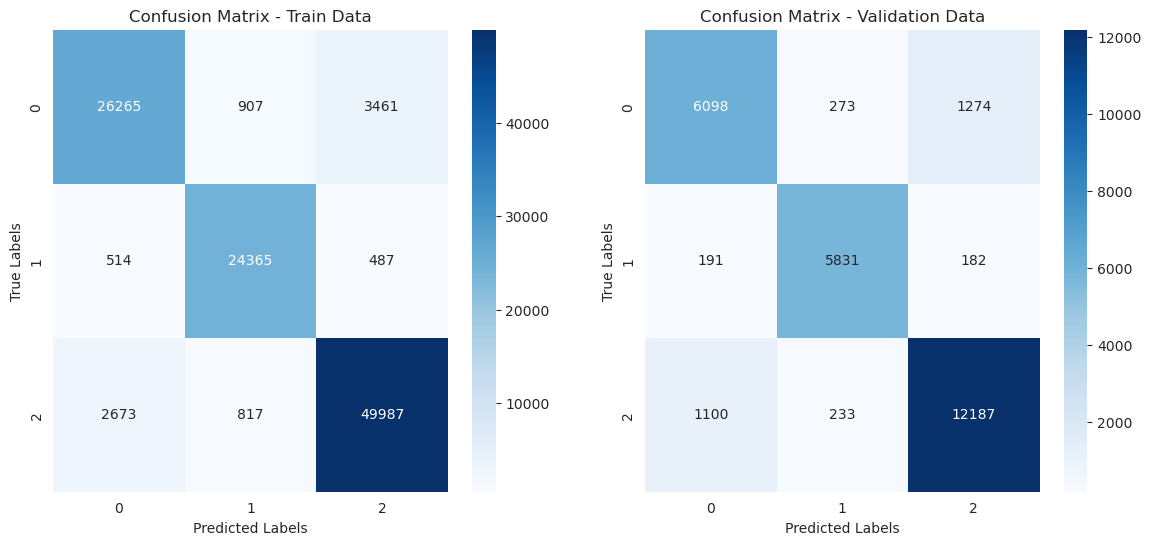

In [185]:
# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train_classes, train_preds_classes)
conf_matrix_val = confusion_matrix(y_val_classes, test_preds_classes)

# Visualize Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(conf_matrix_train, annot=True, fmt='g', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Train Data')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_val, annot=True, fmt='g', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Validation Data')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.show()

In [187]:
# Save model and tokenizer in the working directory
trainer.save_model("final_best_model")
tokenizer.save_pretrained("final_best_model")


('final_best_model/tokenizer_config.json',
 'final_best_model/special_tokens_map.json',
 'final_best_model/vocab.txt',
 'final_best_model/added_tokens.json',
 'final_best_model/tokenizer.json')

In [ ]:
# Save
new_df.to_parquet('cleaned_data.parquet', index=False)

# Load
new_df = pd.read_parquet('cleaned_data.parquet')

# new_df.head()

- **Concatenate the dataframe containing the metrics for the tuned models**

In [189]:
# Concatenate the new metrics to the existing all_metrics DataFrame
best_metrics = pd.concat([best_model_metrics_rf, best_lstm_metrics, best_distilbert_metrics], ignore_index=True)
best_metrics

,Model,Train_Accuracy,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_F1,Test_ROC_AUC,Training_Time,Train Loss,Test Loss
0,"RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_split=5,\n n_jobs=-1, random_state=200)",0.668557,0.672768,0.854122,0.638752,0.638568,0.828464,169.224941,NaN,NaN
1,LSTM,0.882562,0.881539,0.957670,0.856922,0.855675,0.939541,NaN,NaN,NaN
2,DistilBERT,0.919078,0.918720,0.972470,0.881143,0.880661,0.953074,NaN,0.402599,0.417266


# 5.0 Evaluation

### i.) Select the final best model.

- Our final best model for deployment is the tuned DistilBERT.

### ii.) Assess and interpret the training/validation metrics of the final best model.

- **Accuracy:**

    - **Train: 91.91%**
    - **Test: 88.11%**
Accuracy provides a straightforward metric of the model's performance, illustrating its ability to correctly predict sentiment labels. Notably, the model achieves impressive accuracy on both training and test datasets, suggesting a proficient generalization to unseen data. The minimal discrepancy between training and testing accuracy underscores a well-fitted model without apparent overfitting.

- **F1 Score:**

    - **Train: 91.87%**
    - **Test: 88.07%**
The F1 Score, which harmonizes precision and recall, reveals the model's balanced capability in both identifying and correctly classifying positive samples. The commendable F1 scores, for both training and testing datasets, not only affirm the model's robustness in classifying sentiments but also its adeptness in maintaining a balance between false positives and false negatives. The marginal gap between the training and testing scores again points towards a model that generalizes well.

- **ROC-AUC Score:**

    - **Train: 97.25%**
    - **Test: 95.31%**
The ROC-AUC Score provides insight into the model's discriminative power across different sentiment classes, and in this case, the scores indicate a formidable ability to differentiate between various sentiments effectively. Both training and testing scores are notably high, showcasing a model that can accurately discriminate between sentiments, enhancing its reliability in practical applications.

- **Train Loss: 0.403**
- **Validation Loss: 0.417**

The loss function measures the disparity between the model's prediction and the actual label. In this scenario, both the training and validation losses are notably low, which is a positive indicator of the model's performance.

The training loss of 0.403 indicates that the model has learned the training data effectively, capturing the underlying patterns and structures within it.

The validation loss being 0.417, and notably close to the training loss, signifies that the model is able to generalize its learning to unseen data effectively.

The proximity between training and validation loss suggests that the model is neither overfitting nor underfitting the training data. This means it has achieved a good balance in its learning, understanding the underlying patterns without memorizing the training data, and maintaining its predictive power when applied to new, unseen data.


**Key Takeaway:**

The DistilBERT model, despite its computational demands, yields stellar performance across multiple metrics in the sentiment classification task. The consistency in performance, mirrored in the proximity of training and testing scores across all metrics, denotes a model that is both accurate and reliable, adept at navigating the complexities of sentiment classification in the dataset at hand. This proficient performance underscores the potent combination of the DistilBERT architecture and the well-crafted training regimen, spotlighting its potential applicability in real-world sentiment analysis scenarios within similar domains.

### iii.) Clean and Preprocess the unseen test data - Make Predictions - Compare with the actual labels

In [138]:
# Load the test dataset
test_data_path = 'btc_tweets_daily_example.csv'
test_df = pd.read_csv(test_data_path)

# Display first few rows of the test dataset
test_df.head()

,column_a,date,tweet,screen_name,source,link,sentiment,sent_score,new_sentiment_score,new_sentiment_state
0,0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",myresumerocket,[],"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",['neutral'],0,0.000000,0
1,1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,BitMocro,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",['neutral'],0,0.000000,0
2,2,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…,hojachotopur,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",['positive'],1,0.136364,1
3,3,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,[],"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",['positive'],1,0.400000,1
4,4,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; https://t.co/dhprzsSxek\nCurrencies accept…,aditzgraha,[],"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",['positive'],1,0.468182,1


In [139]:
# Check the shape
test_df.shape

(50859, 10)

In [140]:
# Display basic information
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50859 entries, 0 to 50858
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   column_a             50859 non-null  int64  
 1   date                 50859 non-null  object 
 2   tweet                50859 non-null  object 
 3   screen_name          50859 non-null  object 
 4   source               50859 non-null  object 
 5   link                 50859 non-null  object 
 6   sentiment            50859 non-null  object 
 7   sent_score           50859 non-null  int64  
 8   new_sentiment_score  50859 non-null  float64
 9   new_sentiment_state  50859 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 3.9+ MB


In [141]:
# Keep only the relevant columns
test_df = test_df[['tweet', 'sentiment']]

# Check for duplicates
duplicate_rows = test_df.duplicated().sum()

# Check for null values
null_values = test_df.isnull().sum()

print((duplicate_rows))
print((null_values))


22723
tweet        0
sentiment    0
dtype: int64


In [142]:
# Drop duplicates
test_df = test_df.drop_duplicates().reset_index(drop=True)

# Overview after dropping duplicates
test_df.shape


(28136, 2)

In [143]:
# Check the unique values in the "sentiment" column
unique_sentiments = test_df["sentiment"].unique()
unique_sentiments_counts = test_df["sentiment"].value_counts()

(unique_sentiments, unique_sentiments_counts)


(array(["['neutral']", "['positive']", "['negative']"], dtype=object),
 ['neutral']     13438
 ['positive']    10885
 ['negative']     3813
 Name: sentiment, dtype: int64)

In [144]:
# Initialize the lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define the function
def enhanced_clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove Emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Handle URLs
    text = re.sub(r'http\S+', '', text)

    # Handle Numbers
    text = re.sub(r'\d+', '', text)

    # Handle Mentioned Usernames
    text = re.sub(r'@\w+', '', text)

    # Expand contractions using the contractions library
    text = contractions.fix(text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords and perform lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    # Removing Short Words
    tokens = [token for token in tokens if len(token) > 2]

    return ' '.join(tokens)


In [145]:
# Apply the enhanced text cleaning function to the 'tweet' column
test_df['cleaned_tweet'] = test_df['tweet'].apply(enhanced_clean_text)

# Display the first few rows with the cleaned text
test_df[['tweet', 'cleaned_tweet']].head()

,tweet,cleaned_tweet
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",paul krugman nobel luddite tweak nose bitcoin enemy say foolish thing link htt…
1,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,dum said know nothing bitcoin ...
2,RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…,another use case blockchain tipper tippereconomy unseat facebook change everything ico live no…
3,free coins https://t.co/DiuoePJdap,free coin
4,RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; https://t.co/dhprzsSxek\nCurrencies accept…,happy announce payvx presale phase live sign currency accept…


In [146]:
# Save to csv
#test_df.to_csv('cleaned_test_data.csv', index=False)

In [147]:
# Confirm there are no null values
test_df.isnull().sum()

tweet            0
sentiment        0
cleaned_tweet    0
dtype: int64

In [148]:
# Load the tokenizer and model
model_dir = 'final_best_model'
tokenizer = DistilBertTokenizer.from_pretrained(model_dir, additional_special_tokens=['[SENTIMENT]', '[CATEGORY]'])
model = DistilBertForSequenceClassification.from_pretrained(model_dir)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [149]:
import ast  # Abstract Syntax Trees

def convert_label(label):
    try:
        # Try to evaluate the string as a Python literal
        evaluated = ast.literal_eval(label)
        # If it's a list, return the first element as a string
        if isinstance(evaluated, list) and len(evaluated) > 0:
            return str(evaluated[0])
        # Otherwise, return the original label
        return label
    except ValueError:
        # If evaluation fails, return the original label
        return label
    
# Define the test labels
test_labels = test_df['sentiment'].values

# Convert the test labels
test_labels_converted = [convert_label(label) for label in test_labels]


In [136]:
# Tokenize the test data
input_data = tokenizer(test_df['cleaned_tweet'].to_list(), padding=True, truncation=True, 
                       max_length=512, return_tensors='pt')
input_ids = input_data['input_ids']
attention_mask = input_data['attention_mask']

batch_size = 16 
predictions = []
actual_labels = []

# Loop through in batches for predictions
for i in range(0, len(input_ids), batch_size):
    batch_input_ids = input_ids[i:i+batch_size].to(device)
    batch_attention_mask = attention_mask[i:i+batch_size].to(device)
    
    with torch.no_grad():
        outputs = model(batch_input_ids, attention_mask=batch_attention_mask)
        logits = outputs.logits

    probabilities = torch.softmax(logits, dim=-1).cpu().numpy()
    predictions.append(probabilities)
    # Store actual labels
    actual_labels.append(test_labels_converted[i:i+batch_size])

# Concatenate results from all batches
predictions = np.concatenate(predictions, axis=0)
actual_labels = np.concatenate(actual_labels, axis=0)


In [137]:
# Define the compute_metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probabilities = softmax(logits, axis=-1)
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    roc_auc = roc_auc_score(labels, probabilities, multi_class='ovr', average='weighted')
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall, "roc_auc": roc_auc}

# Label encoding the target variable
#le = LabelEncoder()
#new_df['encoded_sentiment'] = le.fit_transform(new_df['sentiment_category'])

# Using the previously created label encoder to transform the test labels
actual_labels_int = le.transform(actual_labels)

# Evaluate the model
eval_pred = (predictions, actual_labels_int)  
metrics = compute_metrics(eval_pred)

# Display the metrics
print(metrics)


{'accuracy': 0.59987205004265, 'f1': 0.5994740745099518, 'precision': 0.6012646348892794, 'recall': 0.59987205004265, 'roc_auc': 0.7449985516123052}


### iv.) Evaluate the performance metrics on the unseen test data.

- **Accuracy: 60%**

This means that 60% of all the model’s predictions on the test data are correct. visualize!!

- **F1 Score: 60%**

The F1 Score is the harmonic mean of precision and recall and provides a balance between the two when the class distribution is imbalanced.
It takes values between 0 and 1, where 1 indicates perfect precision and recall, and 0 indicates neither.

- **Precision: 60%**

Precision is the ratio of correctly predicted positive observations to the total predicted positives. High precision indicates an instance of false positive is low.

- **Recall (Sensitivity): 60%**

Recall is the ratio of correctly predicted positive observations to the all observations in actual class. High recall indicates most of the positive instances were captured by the model.

- **ROC-AUC: 74%**

ROC-AUC tells us how much the model is capable of distinguishing between classes. Higher the AUC, better the model.
A score of 74% indicates a reasonably good ability for the model to differentiate between the different sentiment classes when it's making its predictions.

# Conclusion

- Is the project aligning with/answering our business objectives?

# Recommendations

# Next Steps

# 6.0 Deployment